<a href="https://colab.research.google.com/github/15007919uhi/15007919_DataAnalytics/blob/master/DAOTW_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

As tasked by the New York City emergency services, this report explores data concerning vehicle collisions in the city in relation to weather conditions. It is likely that some form of correlation is present between different types of weather and the frequency of traffic accidents, whether through creating increased traffic on roads or creating more dangerous conditions. The following sections detail both the methodology of the data gathering and an exploration of the findings, with extensive investigation and experimentation to present clearer views of the relationships between the various factors.

# Methodology

The data used in this report was gathered using Google Cloud Platform's BigQuery service. Two sources of datasets were used, the New York Police Department's data on motor collisions in New York City, and the National Oceanic and Atmospheric Administration's dataset on global weather. In order to gather data on collisions, queries were run using the timestamp value of NYPD's dataset to count all collisions that took place on each day. Additional values in the NYPD's dataset including specific collision locations or contributing factors such as unsafe driving or distraction were excluded. While these may provide value to similar studies, for the purposes of this study they were excluded to focus simply on weather. Potential future research could examine links between unsafe driving and weather conditions, however, with a prevalence of factors such as driver inattention or unsafe lane changing, it is uncertain how strong the relationship is.

In terms of weather, the exact weather station that includes New York City was identified in order to gather only the specific data required for this study. Following this, it was important to specify data from 2012 to the current year only, due to the NYPD's dataset only beginning in 2012. Finally, the query included key weather conditions, excluding extraneous values such as the number of counts undertaken to calculate mean values.

With this data successful gathered, a collated dataset was created as shown below.

*Figure 1 - Example Data From the BigQuery Dataset*

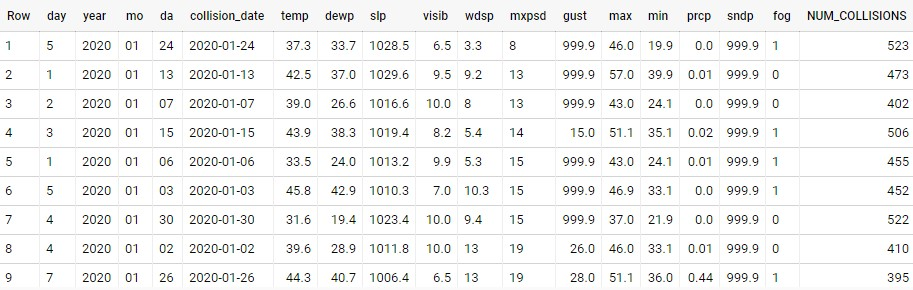

Following the creation of this final data set through Big Query, the CSV file was then cleansed and tidied for the purposes of this analysis. Values were sorted in descending order of the collision date, with the date format adjusted to ensure the year was displayed first, avoiding issues with plots using this value. Duplicate entries for the same day were then manually deleted, and overly high values for certain weather factors were set to zero. Then a final data set was uploaded to Github to be used with Colab, as demonstrated below:

*Figure 2 - Example Data from Github*

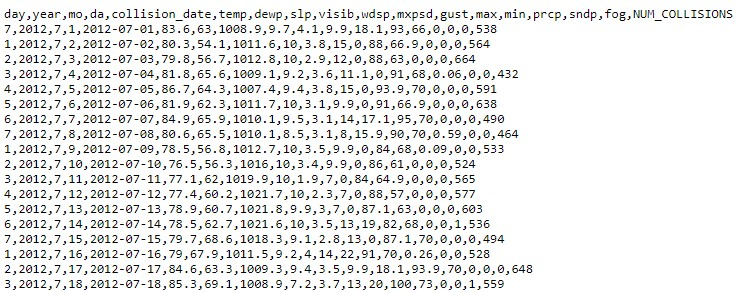

# Findings

Having gathered the data required, it was then ready to be imported into Colab for analysis, as demonstrated below. This section details the different stages of analysis and how this data can be contextualised to better understand the relationships in question.

In [ ]:
collisions <- read.csv("https://raw.githubusercontent.com/15007919uhi/15007919_DataAnalytics/master/results-20201026-191441%202.csv", stringsAsFactors = TRUE)

In [ ]:
head(collisions)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1 7   2012 7  1  2012-07-01     83.6 63.0 1008.9  9.7  4.1   9.9  18.1 93.0
2 1   2012 7  2  2012-07-02     80.3 54.1 1011.6 10.0  3.8  15.0   0.0 88.0
3 2   2012 7  3  2012-07-03     79.8 56.7 1012.8 10.0  2.9  12.0   0.0 88.0
4 3   2012 7  4  2012-07-04     81.8 65.6 1009.1  9.2  3.6  11.1   0.0 91.0
5 4   2012 7  5  2012-07-05     86.7 64.3 1007.4  9.4  3.8  15.0   0.0 93.9
6 5   2012 7  6  2012-07-06     81.9 62.3 1011.7 10.0  3.1   9.9   0.0 91.0
  min  prcp sndp fog NUM_COLLISIONS
1 66.0 0.00 0    0   538           
2 66.9 0.00 0    0   564           
3 63.0 0.00 0    0   664           
4 68.0 0.06 0    0   432           
5 70.0 0.00 0    0   591           
6 66.9 0.00 0    0   638

This presents a simple overview of the initial data set, and six different entries within in. Additionally to this, a more descriptive overview can be seen below, better summarising the values under each heading.

In [ ]:
summary(collisions)

      day             year            mo              da      
 Min.   :1.000   Min.   :2012   Min.   : 1.00   Min.   : 1.0  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.00   1st Qu.: 8.0  
 Median :4.000   Median :2016   Median : 7.00   Median :16.0  
 Mean   :3.999   Mean   :2016   Mean   : 6.59   Mean   :15.7  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.: 9.00   3rd Qu.:23.0  
 Max.   :7.000   Max.   :2020   Max.   :12.00   Max.   :31.0  
                                                              
    collision_date      temp            dewp            slp      
 2012-07-01:   1   Min.   : 5.80   Min.   :-6.70   Min.   :  90  
 2012-07-02:   1   1st Qu.:41.20   1st Qu.:32.70   1st Qu.:1012  
 2012-07-03:   1   Median :52.60   Median :45.80   Median :1017  
 2012-07-04:   1   Mean   :52.35   Mean   :44.79   Mean   :1016  
 2012-07-05:   1   3rd Qu.:64.90   3rd Qu.:59.30   3rd Qu.:1022  
 2012-07-06:   1   Max.   :86.70   Max.   :90.00   Max.   :1044  
 (Other)   :3028                  

This overview creates a better understanding of the data and how it can be used, particularly in terms of what can be discounted or what can be examined in more detail. With certain categories such as 'sndp', snow depth, unreasonably high values denoting missing data were initially prevalent, and required cleansing of data in order to draw conclusions. Entries such as these have been changed to zero, however in many cases these zero values are too overwhelmingly prevalent for these weather factors to be considered useful.

Examining median and quartiles of values for data pertaining to dates is clearly unnecessary, although it does validate that the totals are correct. 

## Initial Findings

By making initial graphs of the data present, it is initially hard to draw concrete conclusions for most factors. Below are simple overviews of some of the more useful factors, viewing numbers of collisions in relation to days of the week and a yearly overview.

In [ ]:
library(lattice)

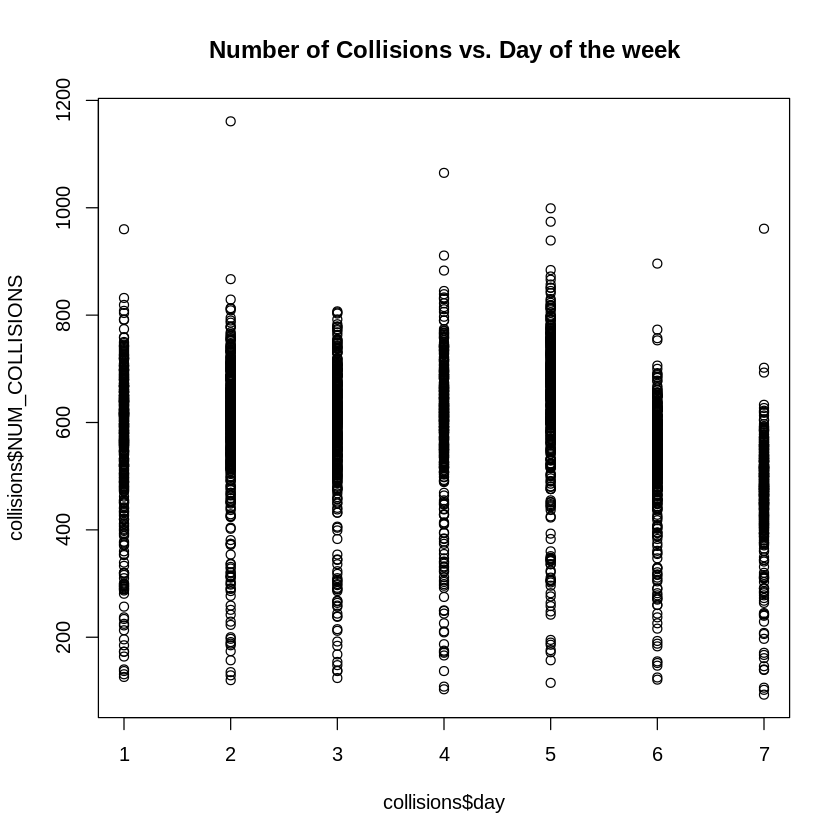

In [ ]:
plot(collisions$day, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week")

In [ ]:
cor(collisions$day, collisions$NUM_COLLISIONS)

[1] -0.1998859

A relatively clear negative correlation can be seen above, with a noticeable drop in collisions on Saturdays and Sundays, although there is a sharp rise on Fridays. Assumptions can be made about reasons for this, such as a decline in traffic on the roads at weekends compared to throughout the typical working week, and a peak in busy traffic late on a Friday as many return from work. Further analysis is required to validate assumptions such as these and will be explored later.

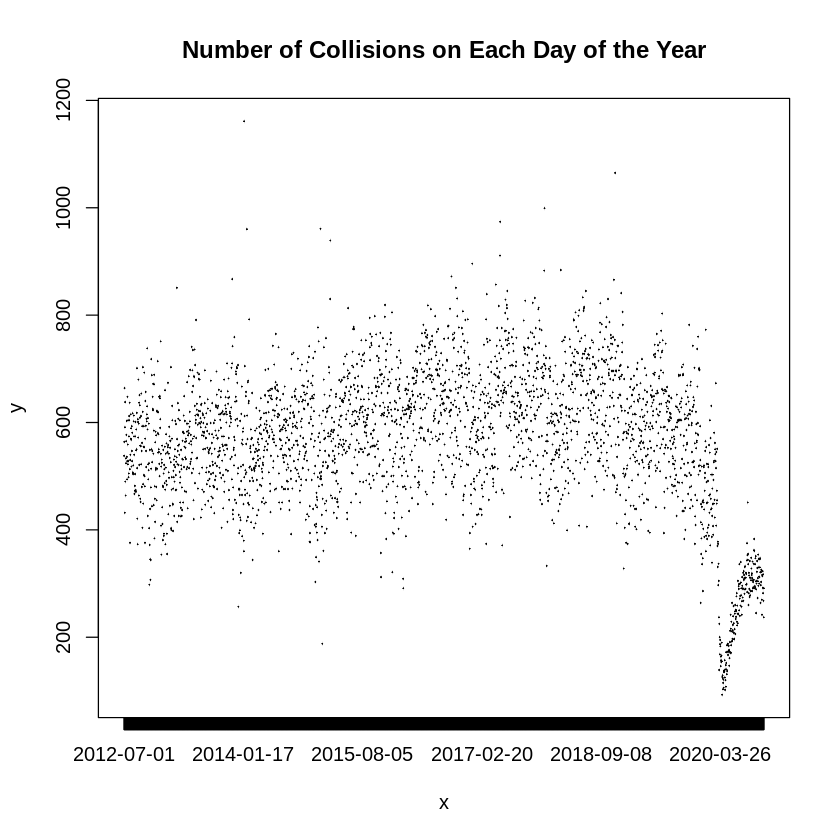

In [ ]:
plot(collisions$collision_date, collisions$NUM_COLLISIONS, main="Number of Collisions on Each Day of the Year")

This scattergraph demonstrates another visualisation of collision data, this time showing a total view of all collisions on each day of the years included in the data set. The beginnings of a pattern are visible here, with noticeable peaks and declines throughout roughly the same parts of each year. Assuming the number of collisions increase as the number of people using taxis increases, reasons for these patterns could be due to typical habits throughout the year, such as holidays and events. However, as this study is an examination of how weather conditions affect collisions, what is of particular interest here is understanding if the patterns of seasonal weather changes show any connection to the patterns of collisions.

Also of note in this diagram is the impact of the Covid-19 pandemic on data; a large downward spike can be seen around late March 2020, coinciding with the state of New York's implementation of lockdown measures (Francescani, 2020), and only seeing a slight increase as the rest of the year has progressed so far. This supports the notion that collisions are directly impacted by the numbers of people using public transport services or present on the roads, although this data may pose problems due to its incompatibility with the previous years' results. This data will likely benefit from examination in isolation from other data. Its smaller total numbers may demonstrate less fluctuation with fewer outliers and support analysis that focuses purely on the impact of weather rather than on typical social factors.

In terms of the connection between weather conditions and collisions, the data is less clear. The below graphs demonstrate these issues.

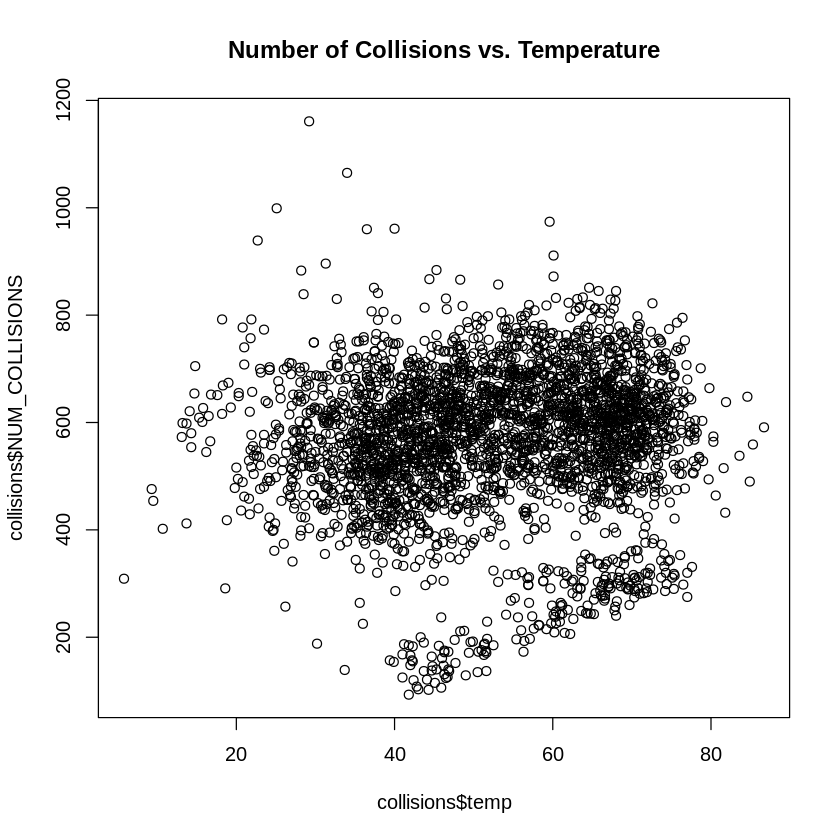

In [ ]:
plot(collisions$temp, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Temperature")

In [ ]:
cor(collisions$temp, collisions$NUM_COLLISIONS)

[1] 0.06392563

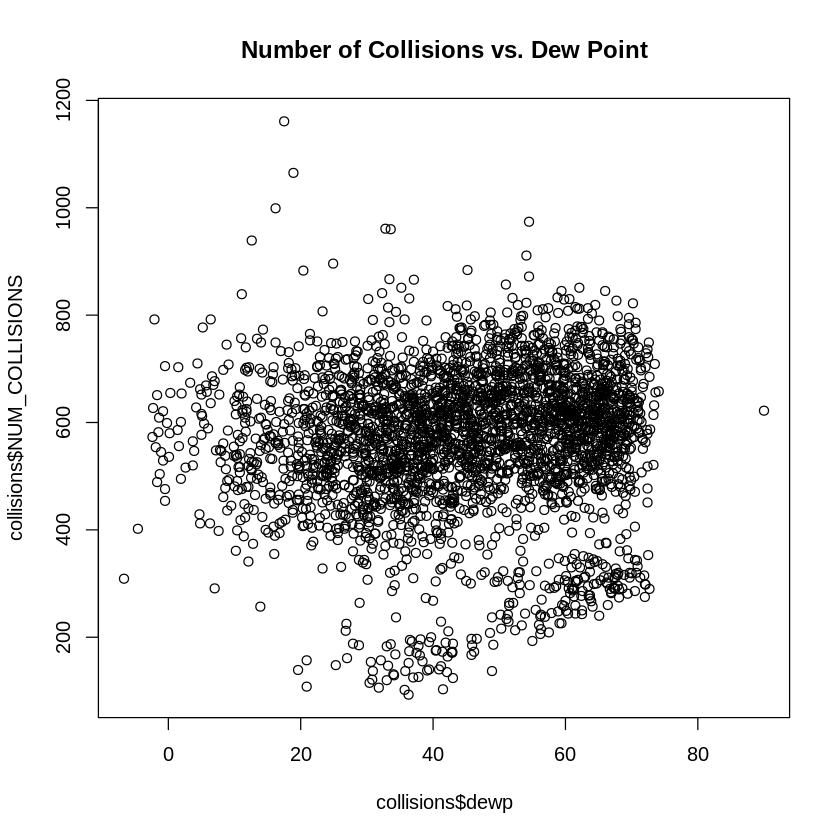

In [ ]:
plot(collisions$dewp, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Dew Point")

In [ ]:
cor(collisions$dewp, collisions$NUM_COLLISIONS)

[1] 0.07359704

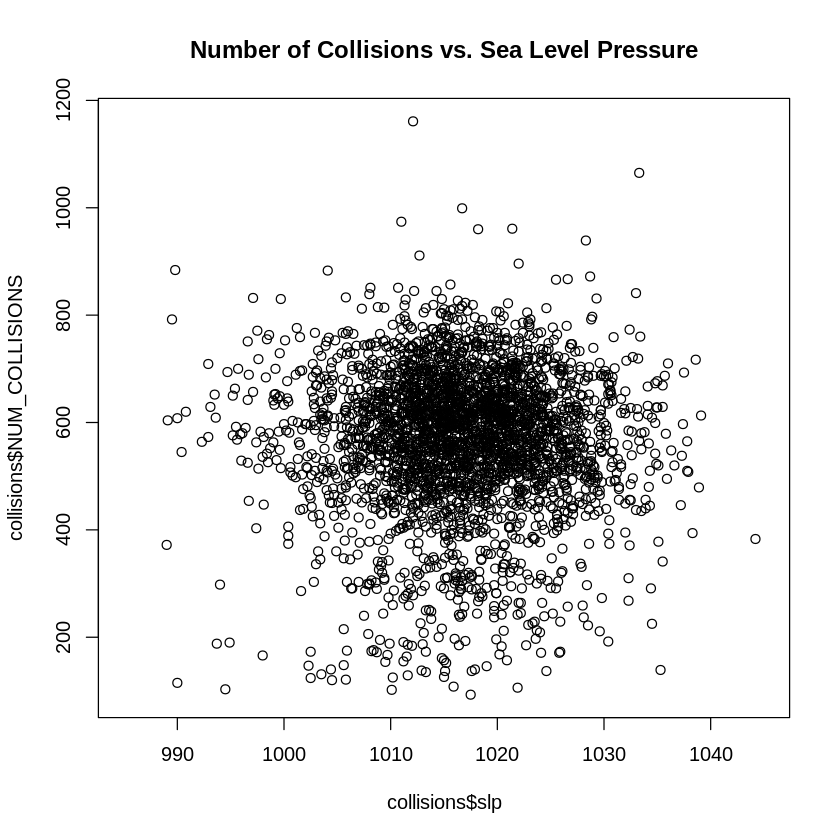

In [ ]:
plot(collisions$slp, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Sea Level Pressure", xlim=c(985,1045))

In [ ]:
cor(collisions$slp, collisions$NUM_COLLISIONS)

[1] 0.02510154

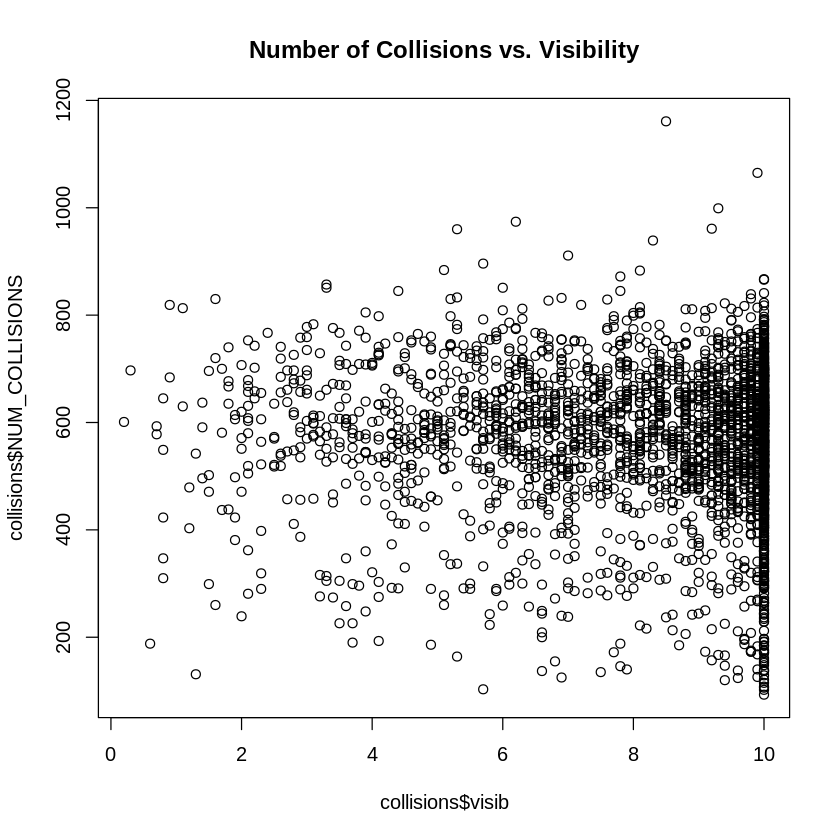

In [ ]:
plot(collisions$visib, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Visibility")

In [ ]:
cor(collisions$visib, collisions$NUM_COLLISIONS)

[1] -0.03465081

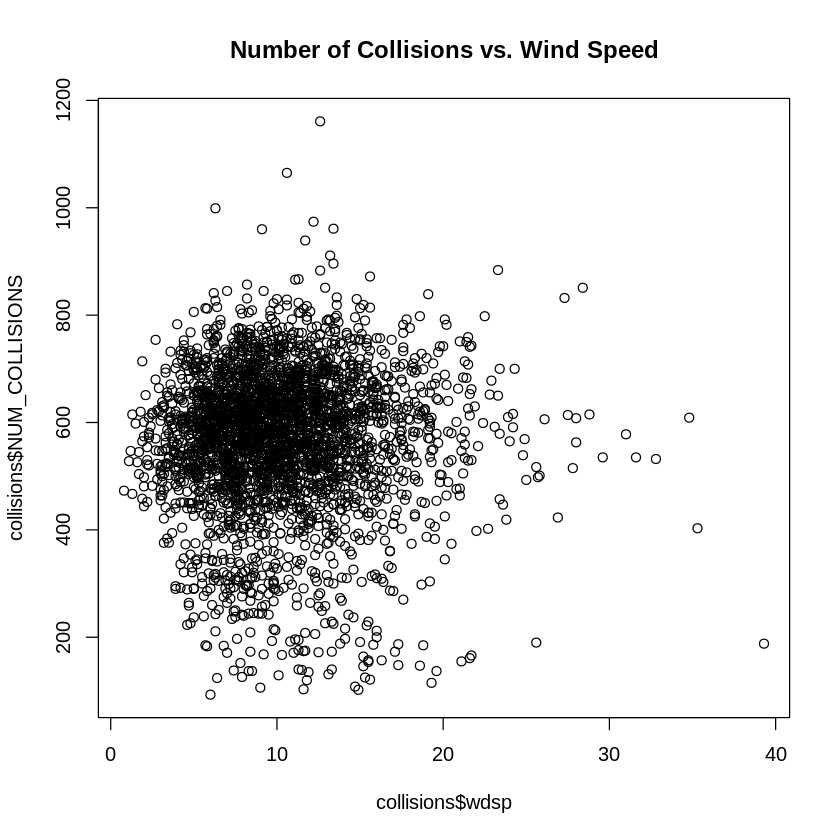

In [ ]:
plot(collisions$wdsp, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Wind Speed")

In [ ]:
cor(collisions$wdsp, collisions$NUM_COLLISIONS)

[1] 0.002259003

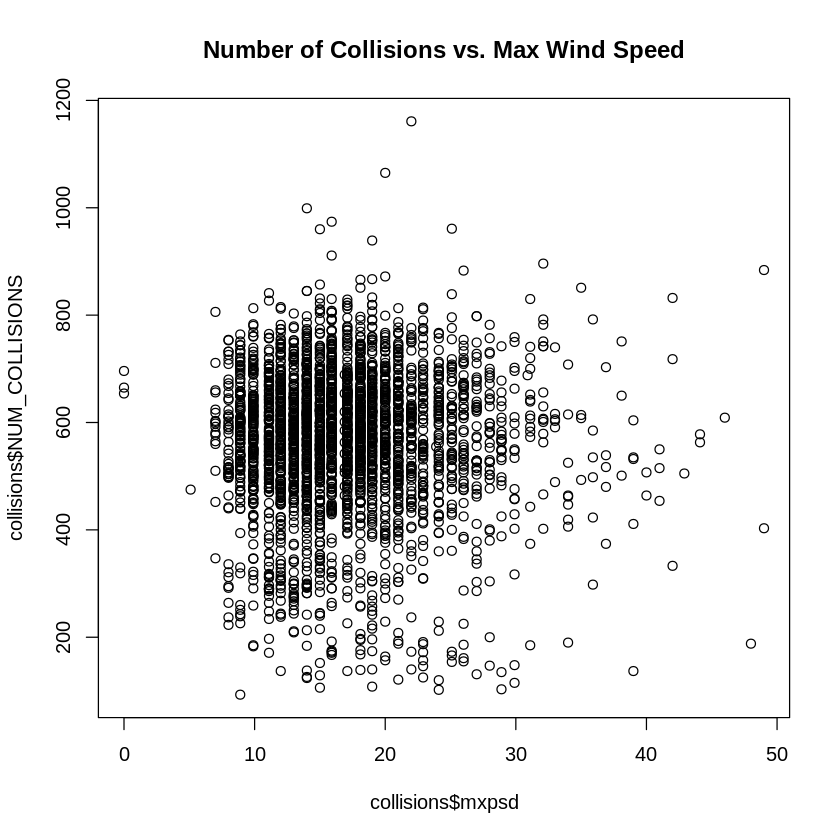

In [ ]:
plot(collisions$mxpsd, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Max Wind Speed")

In [ ]:
cor(collisions$mxpsd, collisions$NUM_COLLISIONS)

[1] -0.0101151

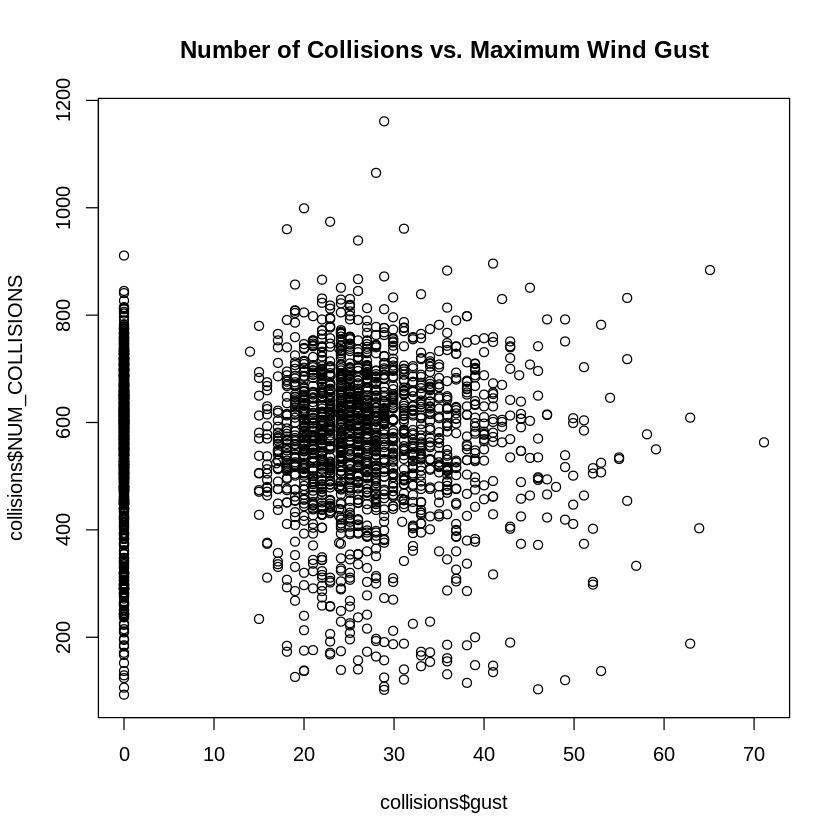

In [ ]:
plot(collisions$gust, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Maximum Wind Gust")

In [ ]:
cor(collisions$gust, collisions$NUM_COLLISIONS)

[1] -0.009006107

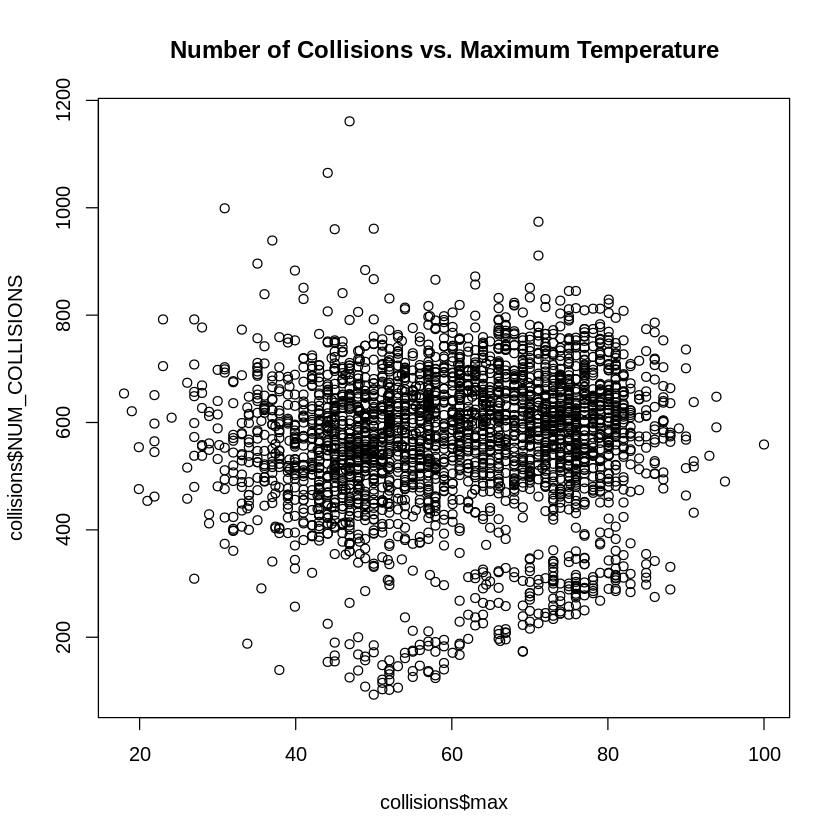

In [ ]:
plot(collisions$max, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Maximum Temperature")

In [ ]:
cor(collisions$max, collisions$NUM_COLLISIONS)

[1] 0.07088686

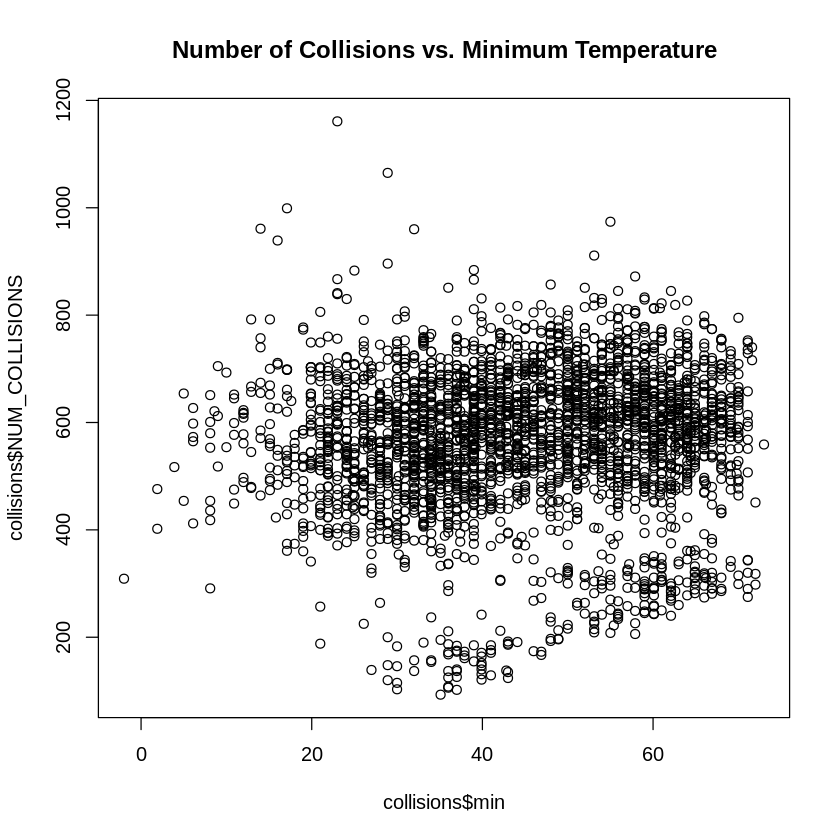

In [ ]:
plot(collisions$min, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Minimum Temperature")

In [ ]:
cor(collisions$min, collisions$NUM_COLLISIONS)

[1] 0.0587157

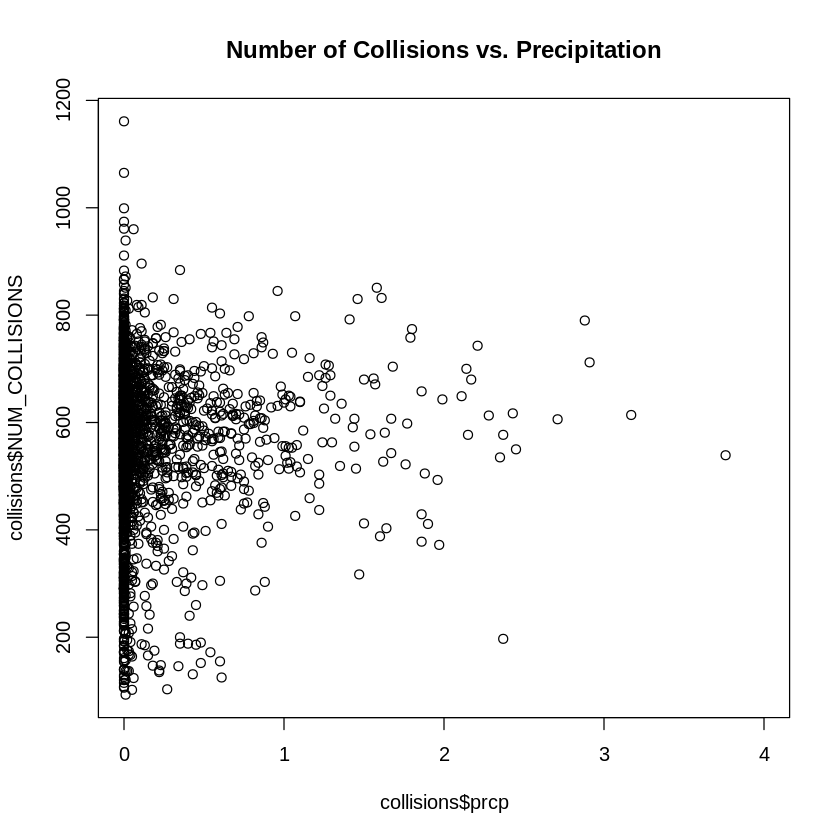

In [ ]:
plot(collisions$prcp, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Precipitation", xlim=c(0,4))

In [ ]:
cor(collisions$prcp, collisions$NUM_COLLISIONS)

[1] 0.02235597

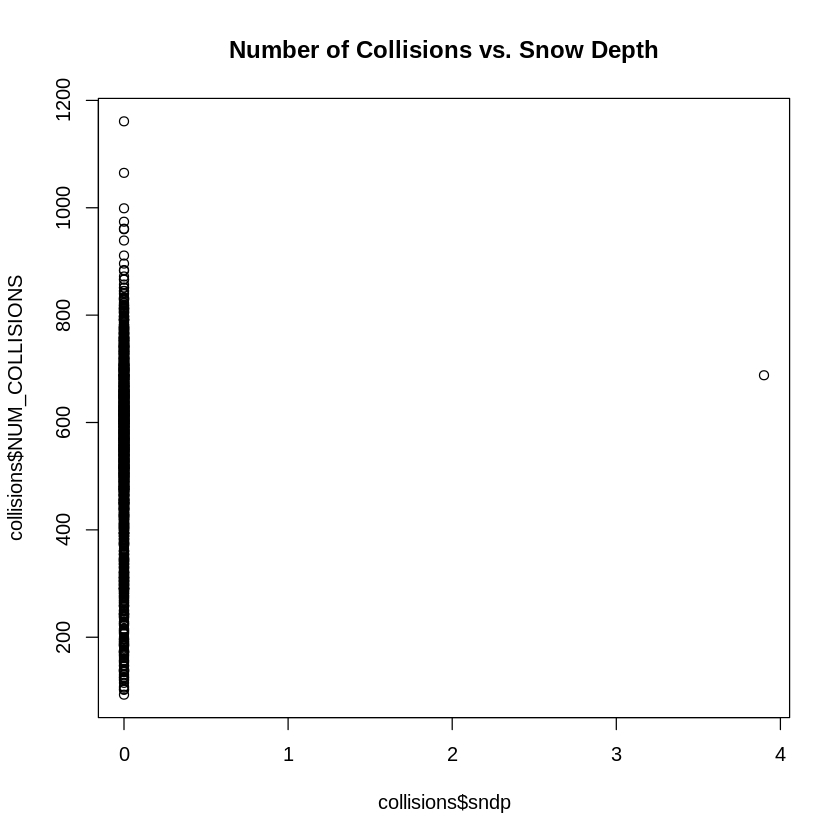

In [ ]:
plot(collisions$sndp, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Snow Depth")

In [ ]:
cor(collisions$sndp, collisions$NUM_COLLISIONS)

[1] 0.01645928

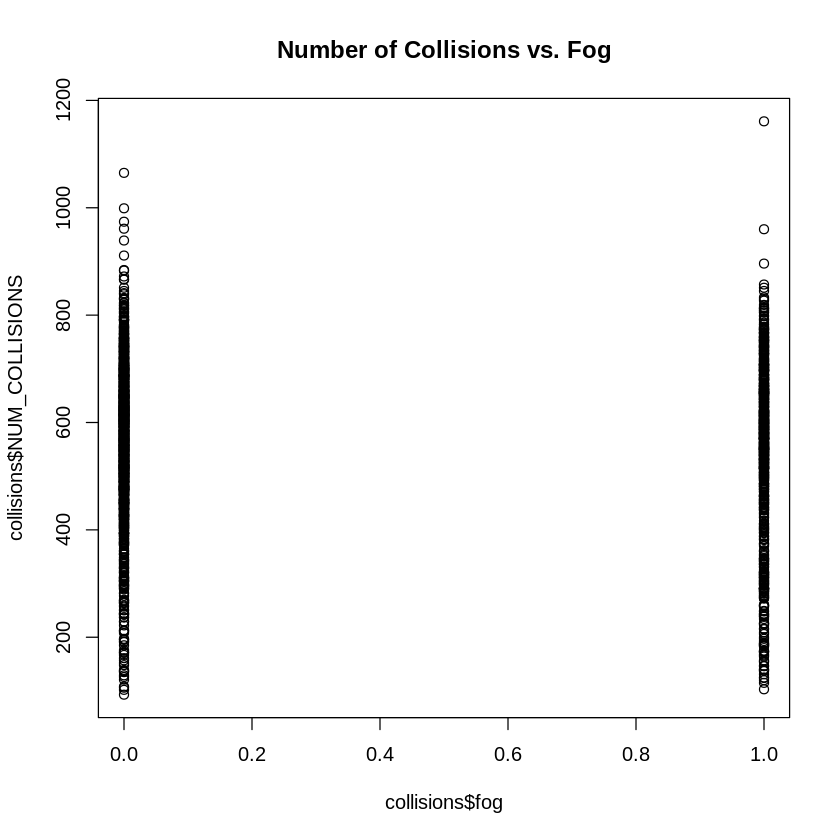

In [ ]:
plot(collisions$fog, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Fog")

In [ ]:
cor(collisions$fog, collisions$NUM_COLLISIONS)

[1] -0.08437679

A preliminary look at each of the weather conditions included in the data set reveals that few clear conclusions can be made.

As noted previously, snow depth can be discarded as a factor due to the lack of data, with almost every value initially set to 999.9 (changed to 0) denoting the absence of snow. As fog is measured simply by the values 0 and 1, it is likely to be unhelpful and can also be ignored.

Values concerning temperature are the closest to demonstrating a positive correlation, with little correlation present in wind data. It can be noted that some values, such as those relating to temperature and dew point, show a number of outliers at around 200 collisions that form their own pattern. It can be assumed these are from 2020 due to the small number of collisions, with these numbers mirroring the figures shown in the year-by-year graph. It is unclear if these figures reflect the general pattern overall, of collisions increasing as the temperature increases, or whether they simply suggest a pattern of lockdown restrictions on traffic easing towards the warmer months of the year. Due to 2020's unusual circumstances, it will be looked at largely in isolation from other results further in this report.

While the 2020 results introduce potential theories as to relationships between certain values, this broad view is largely unhelpful, the next section details alternate ways to dissect the data and expand on these initial findings.

## Expanded Findings

Having examined an initial overview of the full data set, it is now important to examine it in smaller parts. There are many ways the data could be narrowed down and dissected: for example, examining values within a specific range of dates and looking by year, month, or week. Comparing multiple years is an effective starting point, as the brief view of the number of collisions throughout the years suggests there are regular patterns depending on the time of year. Building upon this with a more detailed examination will help to make more concrete evaluations.

Looking by week or month may be too narrow of a view, but examining a range of months may prove useful in order to isolate trends in weather conditions by season and their impact on traffic collisions. By utilising both yearly and seasonal views in tandem, trends will be more easy to see and understand.

As the data for 2012 is not complete, starting in July, for now it will be discarded. The example below uses three of the six full years included to provide a general glance at any seasonal patterns: using 2013, 2015, and 2017

In [ ]:
collisions$collision_date[185:549]

[1] 2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06
  [7] 2013-01-07 2013-01-08 2013-01-09 2013-01-10 2013-01-11 2013-01-12
 [13] 2013-01-13 2013-01-14 2013-01-15 2013-01-16 2013-01-17 2013-01-18
 [19] 2013-01-19 2013-01-20 2013-01-21 2013-01-22 2013-01-23 2013-01-24
 [25] 2013-01-25 2013-01-26 2013-01-27 2013-01-28 2013-01-29 2013-01-30
 [31] 2013-01-31 2013-02-01 2013-02-02 2013-02-03 2013-02-04 2013-02-05
 [37] 2013-02-06 2013-02-07 2013-02-08 2013-02-09 2013-02-10 2013-02-11
 [43] 2013-02-12 2013-02-13 2013-02-14 2013-02-15 2013-02-16 2013-02-17
 [49] 2013-02-18 2013-02-19 2013-02-20 2013-02-21 2013-02-22 2013-02-23
 [55] 2013-02-24 2013-02-25 2013-02-26 2013-02-27 2013-02-28 2013-03-01
 [61] 2013-03-02 2013-03-03 2013-03-04 2013-03-05 2013-03-06 2013-03-07
 [67] 2013-03-08 2013-03-09 2013-03-10 2013-03-11 2013-03-12 2013-03-13
 [73] 2013-03-14 2013-03-15 2013-03-16 2013-03-17 2013-03-18 2013-03-19
 [79] 2013-03-20 2013-03-21 2013-03-22 2013-03-23 2013-03-24 2013-03-25
 [85] 2013-03-26 2013-03-27 2013-03-28 2013-03-29 2013-03-30 2013-03-31
 [91] 2013-04-01 2013-04-02 2013-04-03 2013-04-04 2013-04-05 2013-04-06
 [97] 2013-04-07 2013-04-08 2013-04-09 2013-04-10 2013-04-11 2013-04-12
[103] 2013-04-13 2013-04-14 2013-04-15 2013-04-16 2013-04-17 2013-04-18
[109] 2013-04-19 2013-04-20 2013-04-21 2013-04-22 2013-04-23 2013-04-24
[115] 2013-04-25 2013-04-26 2013-04-27 2013-04-28 2013-04-29 2013-04-30
[121] 2013-05-01 2013-05-02 2013-05-03 2013-05-04 2013-05-05 2013-05-06
[127] 2013-05-07 2013-05-08 2013-05-09 2013-05-10 2013-05-11 2013-05-12
[133] 2013-05-13 2013-05-14 2013-05-15 2013-05-16 2013-05-17 2013-05-18
[139] 2013-05-19 2013-05-20 2013-05-21 2013-05-22 2013-05-23 2013-05-24
[145] 2013-05-25 2013-05-26 2013-05-27 2013-05-28 2013-05-29 2013-05-30
[151] 2013-05-31 2013-06-01 2013-06-02 2013-06-03 2013-06-04 2013-06-05
[157] 2013-06-06 2013-06-07 2013-06-08 2013-06-09 2013-06-10 2013-06-11
[163] 2013-06-12 2013-06-13 2013-06-14 2013-06-15 2013-06-16 2013-06-17
[169] 2013-06-18 2013-06-19 2013-06-20 2013-06-21 2013-06-22 2013-06-23
[175] 2013-06-24 2013-06-25 2013-06-26 2013-06-27 2013-06-28 2013-06-29
[181] 2013-06-30 2013-07-01 2013-07-02 2013-07-03 2013-07-04 2013-07-05
[187] 2013-07-06 2013-07-07 2013-07-08 2013-07-09 2013-07-10 2013-07-11
[193] 2013-07-12 2013-07-13 2013-07-14 2013-07-15 2013-07-16 2013-07-17
[199] 2013-07-18 2013-07-19 2013-07-20 2013-07-21 2013-07-22 2013-07-23
[205] 2013-07-24 2013-07-25 2013-07-26 2013-07-27 2013-07-28 2013-07-29
[211] 2013-07-30 2013-07-31 2013-08-01 2013-08-02 2013-08-03 2013-08-04
[217] 2013-08-05 2013-08-06 2013-08-07 2013-08-08 2013-08-09 2013-08-10
[223] 2013-08-11 2013-08-12 2013-08-13 2013-08-14 2013-08-15 2013-08-16
[229] 2013-08-17 2013-08-18 2013-08-19 2013-08-20 2013-08-21 2013-08-22
[235] 2013-08-23 2013-08-24 2013-08-25 2013-08-26 2013-08-27 2013-08-28
[241] 2013-08-29 2013-08-30 2013-08-31 2013-09-01 2013-09-02 2013-09-03
[247] 2013-09-04 2013-09-05 2013-09-06 2013-09-07 2013-09-08 2013-09-09
[253] 2013-09-10 2013-09-11 2013-09-12 2013-09-13 2013-09-14 2013-09-15
[259] 2013-09-16 2013-09-17 2013-09-18 2013-09-19 2013-09-20 2013-09-21
[265] 2013-09-22 2013-09-23 2013-09-24 2013-09-25 2013-09-26 2013-09-27
[271] 2013-09-28 2013-09-29 2013-09-30 2013-10-01 2013-10-02 2013-10-03
[277] 2013-10-04 2013-10-05 2013-10-06 2013-10-07 2013-10-08 2013-10-09
[283] 2013-10-10 2013-10-11 2013-10-12 2013-10-13 2013-10-14 2013-10-15
[289] 2013-10-16 2013-10-17 2013-10-18 2013-10-19 2013-10-20 2013-10-21
[295] 2013-10-22 2013-10-23 2013-10-24 2013-10-25 2013-10-26 2013-10-27
[301] 2013-10-28 2013-10-29 2013-10-30 2013-10-31 2013-11-01 2013-11-02
[307] 2013-11-03 2013-11-04 2013-11-05 2013-11-06 2013-11-07 2013-11-08
[313] 2013-11-09 2013-11-10 2013-11-11 2013-11-12 2013-11-13 2013-11-14
[319] 2013-11-15 2013-11-16 2013-11-17 2013-11-18 2013-11-19 2013-11-20
[325] 2013-11-21 2013-11-22 2013-11-23 2013-11-24 2013-11-25 2013-11-26
[331] 2013-11-27 2013-11-28 2013-11-29 201

In [ ]:
collisions$collision_date[915:1279]

[1] 2015-01-01 2015-01-02 2015-01-03 2015-01-04 2015-01-05 2015-01-06
  [7] 2015-01-07 2015-01-08 2015-01-09 2015-01-10 2015-01-11 2015-01-12
 [13] 2015-01-13 2015-01-14 2015-01-15 2015-01-16 2015-01-17 2015-01-18
 [19] 2015-01-19 2015-01-20 2015-01-21 2015-01-22 2015-01-23 2015-01-24
 [25] 2015-01-25 2015-01-26 2015-01-27 2015-01-28 2015-01-29 2015-01-30
 [31] 2015-01-31 2015-02-01 2015-02-02 2015-02-03 2015-02-04 2015-02-05
 [37] 2015-02-06 2015-02-07 2015-02-08 2015-02-09 2015-02-10 2015-02-11
 [43] 2015-02-12 2015-02-13 2015-02-14 2015-02-15 2015-02-16 2015-02-17
 [49] 2015-02-18 2015-02-19 2015-02-20 2015-02-21 2015-02-22 2015-02-23
 [55] 2015-02-24 2015-02-25 2015-02-26 2015-02-27 2015-02-28 2015-03-01
 [61] 2015-03-02 2015-03-03 2015-03-04 2015-03-05 2015-03-06 2015-03-07
 [67] 2015-03-08 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13
 [73] 2015-03-14 2015-03-15 2015-03-16 2015-03-17 2015-03-18 2015-03-19
 [79] 2015-03-20 2015-03-21 2015-03-22 2015-03-23 2015-03-24 2015-03-25
 [85] 2015-03-26 2015-03-27 2015-03-28 2015-03-29 2015-03-30 2015-03-31
 [91] 2015-04-01 2015-04-02 2015-04-03 2015-04-04 2015-04-05 2015-04-06
 [97] 2015-04-07 2015-04-08 2015-04-09 2015-04-10 2015-04-11 2015-04-12
[103] 2015-04-13 2015-04-14 2015-04-15 2015-04-16 2015-04-17 2015-04-18
[109] 2015-04-19 2015-04-20 2015-04-21 2015-04-22 2015-04-23 2015-04-24
[115] 2015-04-25 2015-04-26 2015-04-27 2015-04-28 2015-04-29 2015-04-30
[121] 2015-05-01 2015-05-02 2015-05-03 2015-05-04 2015-05-05 2015-05-06
[127] 2015-05-07 2015-05-08 2015-05-09 2015-05-10 2015-05-11 2015-05-12
[133] 2015-05-13 2015-05-14 2015-05-15 2015-05-16 2015-05-17 2015-05-18
[139] 2015-05-19 2015-05-20 2015-05-21 2015-05-22 2015-05-23 2015-05-24
[145] 2015-05-25 2015-05-26 2015-05-27 2015-05-28 2015-05-29 2015-05-30
[151] 2015-05-31 2015-06-01 2015-06-02 2015-06-03 2015-06-04 2015-06-05
[157] 2015-06-06 2015-06-07 2015-06-08 2015-06-09 2015-06-10 2015-06-11
[163] 2015-06-12 2015-06-13 2015-06-14 2015-06-15 2015-06-16 2015-06-17
[169] 2015-06-18 2015-06-19 2015-06-20 2015-06-21 2015-06-22 2015-06-23
[175] 2015-06-24 2015-06-25 2015-06-26 2015-06-27 2015-06-28 2015-06-29
[181] 2015-06-30 2015-07-01 2015-07-02 2015-07-03 2015-07-04 2015-07-05
[187] 2015-07-06 2015-07-07 2015-07-08 2015-07-09 2015-07-10 2015-07-11
[193] 2015-07-12 2015-07-13 2015-07-14 2015-07-15 2015-07-16 2015-07-17
[199] 2015-07-18 2015-07-19 2015-07-20 2015-07-21 2015-07-22 2015-07-23
[205] 2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29
[211] 2015-07-30 2015-07-31 2015-08-01 2015-08-02 2015-08-03 2015-08-04
[217] 2015-08-05 2015-08-06 2015-08-07 2015-08-08 2015-08-09 2015-08-10
[223] 2015-08-11 2015-08-12 2015-08-13 2015-08-14 2015-08-15 2015-08-16
[229] 2015-08-17 2015-08-18 2015-08-19 2015-08-20 2015-08-21 2015-08-22
[235] 2015-08-23 2015-08-24 2015-08-25 2015-08-26 2015-08-27 2015-08-28
[241] 2015-08-29 2015-08-30 2015-08-31 2015-09-01 2015-09-02 2015-09-03
[247] 2015-09-04 2015-09-05 2015-09-06 2015-09-07 2015-09-08 2015-09-09
[253] 2015-09-10 2015-09-11 2015-09-12 2015-09-13 2015-09-14 2015-09-15
[259] 2015-09-16 2015-09-17 2015-09-18 2015-09-19 2015-09-20 2015-09-21
[265] 2015-09-22 2015-09-23 2015-09-24 2015-09-25 2015-09-26 2015-09-27
[271] 2015-09-28 2015-09-29 2015-09-30 2015-10-01 2015-10-02 2015-10-03
[277] 2015-10-04 2015-10-05 2015-10-06 2015-10-07 2015-10-08 2015-10-09
[283] 2015-10-10 2015-10-11 2015-10-12 2015-10-13 2015-10-14 2015-10-15
[289] 2015-10-16 2015-10-17 2015-10-18 2015-10-19 2015-10-20 2015-10-21
[295] 2015-10-22 2015-10-23 2015-10-24 2015-10-25 2015-10-26 2015-10-27
[301] 2015-10-28 2015-10-29 2015-10-30 2015-10-31 2015-11-01 2015-11-02
[307] 2015-11-03 2015-11-04 2015-11-05 2015-11-06 2015-11-07 2015-11-08
[313] 2015-11-09 2015-11-10 2015-11-11 2015-11-12 2015-11-13 2015-11-14
[319] 2015-11-15 2015-11-16 2015-11-17 2015-11-18 2015-11-19 2015-11-20
[325] 2015-11-21 2015-11-22 2015-11-23 2015-11-24 2015-11-25 2015-11-26
[331] 2015-11-27 2015-11-28 2015-11-29 201

In [ ]:
collisions$collision_date[1646:2010]

[1] 2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-05 2017-01-06
  [7] 2017-01-07 2017-01-08 2017-01-09 2017-01-10 2017-01-11 2017-01-12
 [13] 2017-01-13 2017-01-14 2017-01-15 2017-01-16 2017-01-17 2017-01-18
 [19] 2017-01-19 2017-01-20 2017-01-21 2017-01-22 2017-01-23 2017-01-24
 [25] 2017-01-25 2017-01-26 2017-01-27 2017-01-28 2017-01-29 2017-01-30
 [31] 2017-01-31 2017-02-01 2017-02-02 2017-02-03 2017-02-04 2017-02-05
 [37] 2017-02-06 2017-02-07 2017-02-08 2017-02-09 2017-02-10 2017-02-11
 [43] 2017-02-12 2017-02-13 2017-02-14 2017-02-15 2017-02-16 2017-02-17
 [49] 2017-02-18 2017-02-19 2017-02-20 2017-02-21 2017-02-22 2017-02-23
 [55] 2017-02-24 2017-02-25 2017-02-26 2017-02-27 2017-02-28 2017-03-01
 [61] 2017-03-02 2017-03-03 2017-03-04 2017-03-05 2017-03-06 2017-03-07
 [67] 2017-03-08 2017-03-09 2017-03-10 2017-03-11 2017-03-12 2017-03-13
 [73] 2017-03-14 2017-03-15 2017-03-16 2017-03-17 2017-03-18 2017-03-19
 [79] 2017-03-20 2017-03-21 2017-03-22 2017-03-23 2017-03-24 2017-03-25
 [85] 2017-03-26 2017-03-27 2017-03-28 2017-03-29 2017-03-30 2017-03-31
 [91] 2017-04-01 2017-04-02 2017-04-03 2017-04-04 2017-04-05 2017-04-06
 [97] 2017-04-07 2017-04-08 2017-04-09 2017-04-10 2017-04-11 2017-04-12
[103] 2017-04-13 2017-04-14 2017-04-15 2017-04-16 2017-04-17 2017-04-18
[109] 2017-04-19 2017-04-20 2017-04-21 2017-04-22 2017-04-23 2017-04-24
[115] 2017-04-25 2017-04-26 2017-04-27 2017-04-28 2017-04-29 2017-04-30
[121] 2017-05-01 2017-05-02 2017-05-03 2017-05-04 2017-05-05 2017-05-06
[127] 2017-05-07 2017-05-08 2017-05-09 2017-05-10 2017-05-11 2017-05-12
[133] 2017-05-13 2017-05-14 2017-05-15 2017-05-16 2017-05-17 2017-05-18
[139] 2017-05-19 2017-05-20 2017-05-21 2017-05-22 2017-05-23 2017-05-24
[145] 2017-05-25 2017-05-26 2017-05-27 2017-05-28 2017-05-29 2017-05-30
[151] 2017-05-31 2017-06-01 2017-06-02 2017-06-03 2017-06-04 2017-06-05
[157] 2017-06-06 2017-06-07 2017-06-08 2017-06-09 2017-06-10 2017-06-11
[163] 2017-06-12 2017-06-13 2017-06-14 2017-06-15 2017-06-16 2017-06-17
[169] 2017-06-18 2017-06-19 2017-06-20 2017-06-21 2017-06-22 2017-06-23
[175] 2017-06-24 2017-06-25 2017-06-26 2017-06-27 2017-06-28 2017-06-29
[181] 2017-06-30 2017-07-01 2017-07-02 2017-07-03 2017-07-04 2017-07-05
[187] 2017-07-06 2017-07-07 2017-07-08 2017-07-09 2017-07-10 2017-07-11
[193] 2017-07-12 2017-07-13 2017-07-14 2017-07-15 2017-07-16 2017-07-17
[199] 2017-07-18 2017-07-19 2017-07-20 2017-07-21 2017-07-22 2017-07-23
[205] 2017-07-24 2017-07-25 2017-07-26 2017-07-27 2017-07-28 2017-07-29
[211] 2017-07-30 2017-07-31 2017-08-01 2017-08-02 2017-08-03 2017-08-04
[217] 2017-08-05 2017-08-06 2017-08-07 2017-08-08 2017-08-09 2017-08-10
[223] 2017-08-11 2017-08-12 2017-08-13 2017-08-14 2017-08-15 2017-08-16
[229] 2017-08-17 2017-08-18 2017-08-19 2017-08-20 2017-08-21 2017-08-22
[235] 2017-08-23 2017-08-24 2017-08-25 2017-08-26 2017-08-27 2017-08-28
[241] 2017-08-29 2017-08-30 2017-08-31 2017-09-01 2017-09-02 2017-09-03
[247] 2017-09-04 2017-09-05 2017-09-06 2017-09-07 2017-09-08 2017-09-09
[253] 2017-09-10 2017-09-11 2017-09-12 2017-09-13 2017-09-14 2017-09-15
[259] 2017-09-16 2017-09-17 2017-09-18 2017-09-19 2017-09-20 2017-09-21
[265] 2017-09-22 2017-09-23 2017-09-24 2017-09-25 2017-09-26 2017-09-27
[271] 2017-09-28 2017-09-29 2017-09-30 2017-10-01 2017-10-02 2017-10-03
[277] 2017-10-04 2017-10-05 2017-10-06 2017-10-07 2017-10-08 2017-10-09
[283] 2017-10-10 2017-10-11 2017-10-12 2017-10-13 2017-10-14 2017-10-15
[289] 2017-10-16 2017-10-17 2017-10-18 2017-10-19 2017-10-20 2017-10-21
[295] 2017-10-22 2017-10-23 2017-10-24 2017-10-25 2017-10-26 2017-10-27
[301] 2017-10-28 2017-10-29 2017-10-30 2017-10-31 2017-11-01 2017-11-02
[307] 2017-11-03 2017-11-04 2017-11-05 2017-11-06 2017-11-07 2017-11-08
[313] 2017-11-09 2017-11-10 2017-11-11 2017-11-12 2017-11-13 2017-11-14
[319] 2017-11-15 2017-11-16 2017-11-17 2017-11-18 2017-11-19 2017-11-20
[325] 2017-11-21 2017-11-22 2017-11-23 2017-11-24 2017-11-25 2017-11-26
[331] 2017-11-27 2017-11-28 2017-11-29 201

The above elements verify the date ranges to ensure the below scatter plots are correct.

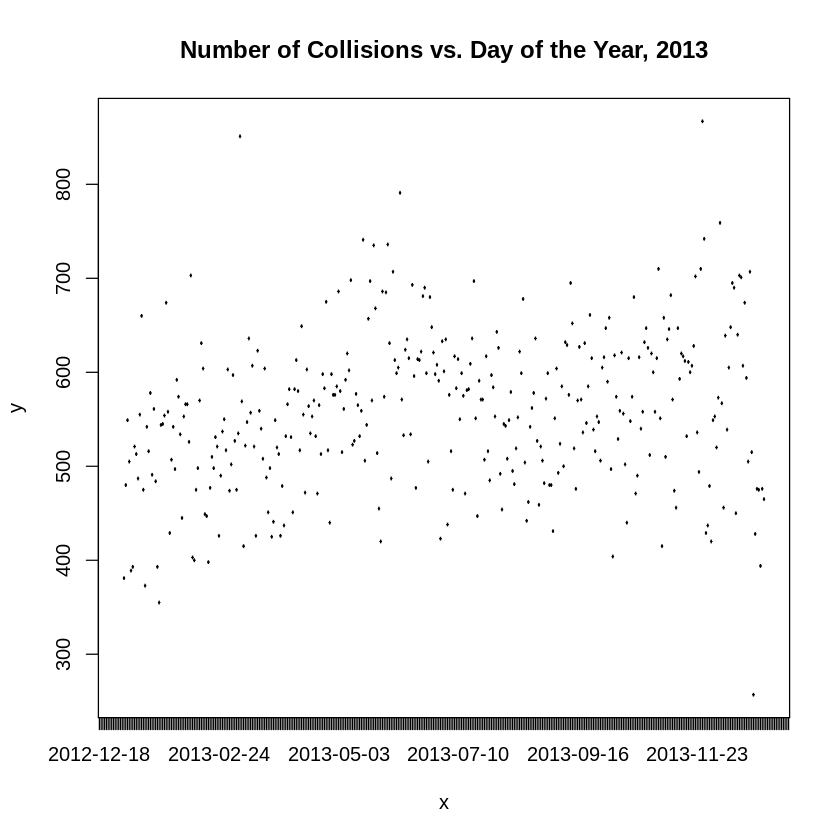

In [ ]:
plot(collisions$collision_date[185:549], collisions$NUM_COLLISIONS[185:549], main="Number of Collisions vs. Day of the Year, 2013", xlim=c(185, 549))

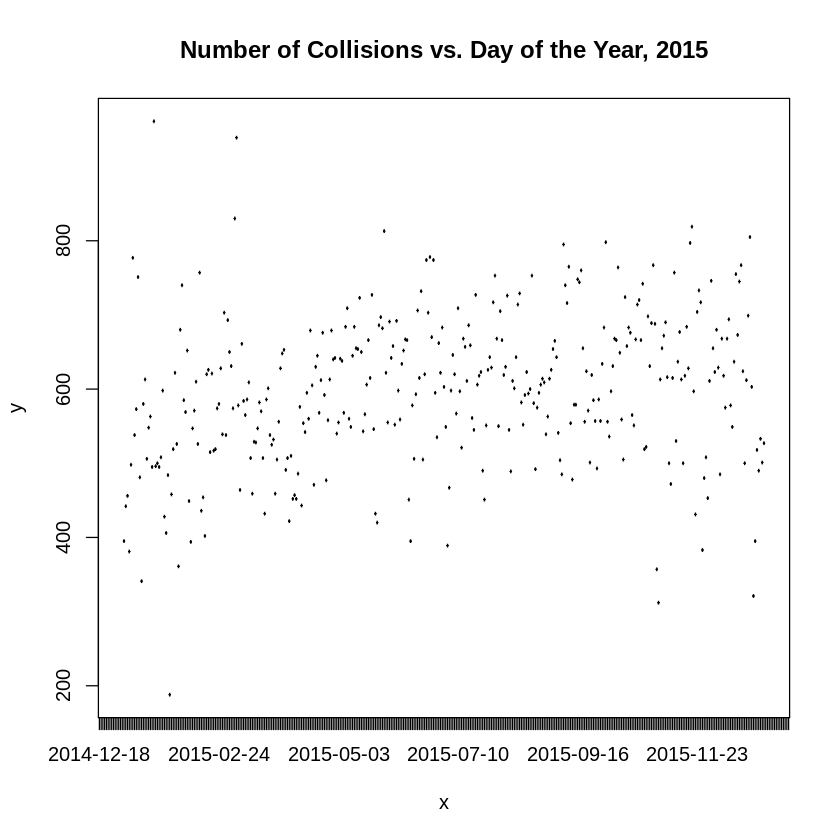

In [ ]:
plot(collisions$collision_date[915:1279], collisions$NUM_COLLISIONS[915:1279], main="Number of Collisions vs. Day of the Year, 2015", xlim=c(915, 1279))

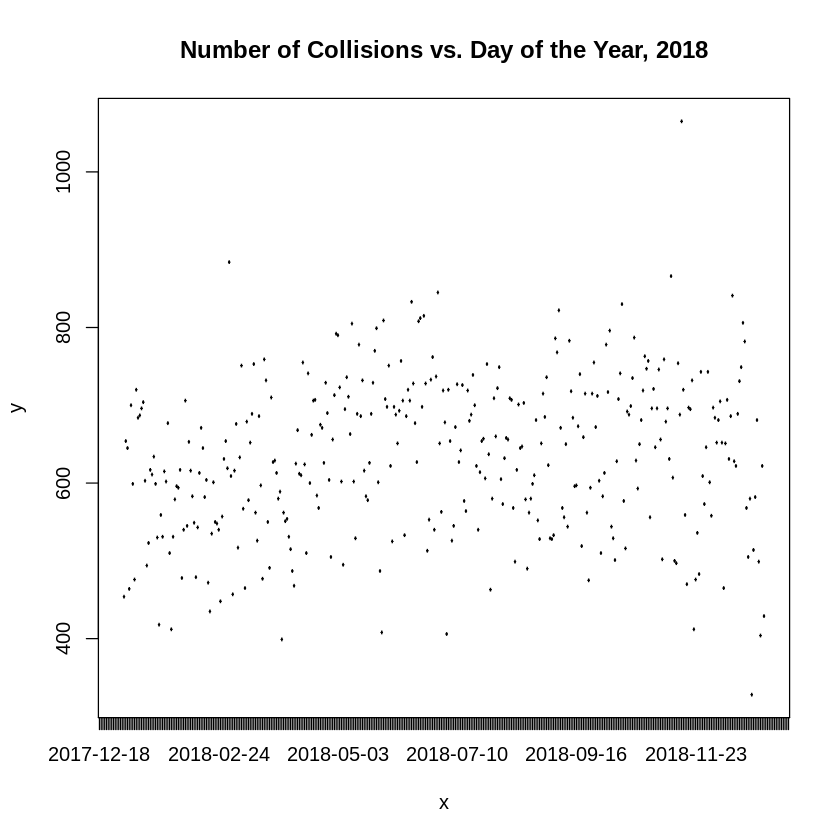

In [ ]:
plot(collisions$collision_date[2011:2376], collisions$NUM_COLLISIONS[2011:2376], main="Number of Collisions vs. Day of the Year, 2018", xlim=c(2011, 2376))

While the plots above are still not enough to draw any strong conclusions from, they share many similarities that can be extrapolated further. Collision numbers increase throughout the start of the year, with somewhat of a decline around the start of Autumn, before increasing again towards the end of the year. This can be visualised further by diving the full dataset by year and overlaying more yearly views, as demonstrated below.

In [ ]:
csplit <- collisions

In [ ]:
cs12 <- csplit[which(csplit$year == 2012), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(cs12))
dayindex <- 1*seq_len(nrow(cs12))
cs12a <- cbind(dayindex, dayofyear, cs12)

In [ ]:
cs13 <- csplit[which(csplit$year == 2013), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(cs13))
dayindex <- 1*seq_len(nrow(cs13)) + 185
cs13a <- cbind(dayindex, dayofyear, cs13)

In [ ]:
cs14 <- csplit[which(csplit$year == 2014), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(cs14))
dayindex <- 1*seq_len(nrow(cs14)) + 550
cs14a <- cbind(dayindex, dayofyear, cs14)

In [ ]:
cs15 <- csplit[which(csplit$year == 2015), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(cs15))
dayindex <- 1*seq_len(nrow(cs15)) + 915
cs15a <- cbind(dayindex, dayofyear, cs15)

In [ ]:
cs16 <- csplit[which(csplit$year == 2016), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(cs16))
dayindex <- 1*seq_len(nrow(cs16)) + 1280
cs16a <- cbind(dayindex, dayofyear, cs16)

In [ ]:
cs17 <- csplit[which(csplit$year == 2017), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(cs17))
dayindex <- 1*seq_len(nrow(cs17)) + 1646
cs17a <- cbind(dayindex, dayofyear, cs17)

In [ ]:
cs18 <- csplit[which(csplit$year == 2018), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(cs18))
dayindex <- 1*seq_len(nrow(cs18)) + 2011
cs18a <- cbind(dayindex, dayofyear, cs18)

In [ ]:
cs19 <- csplit[which(csplit$year == 2019), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(cs19))
dayindex <- 1*seq_len(nrow(cs19)) + 2376
cs19a <- cbind(dayindex, dayofyear, cs19)

In [ ]:
cs20 <- csplit[which(csplit$year == 2020), ]

In [ ]:
dayofyear <- 1*seq_len(nrow(cs20))
dayindex <- 1*seq_len(nrow(cs20)) + 2741
cs20a <- cbind(dayindex, dayofyear, cs20)

In [ ]:
library(ggplot2)

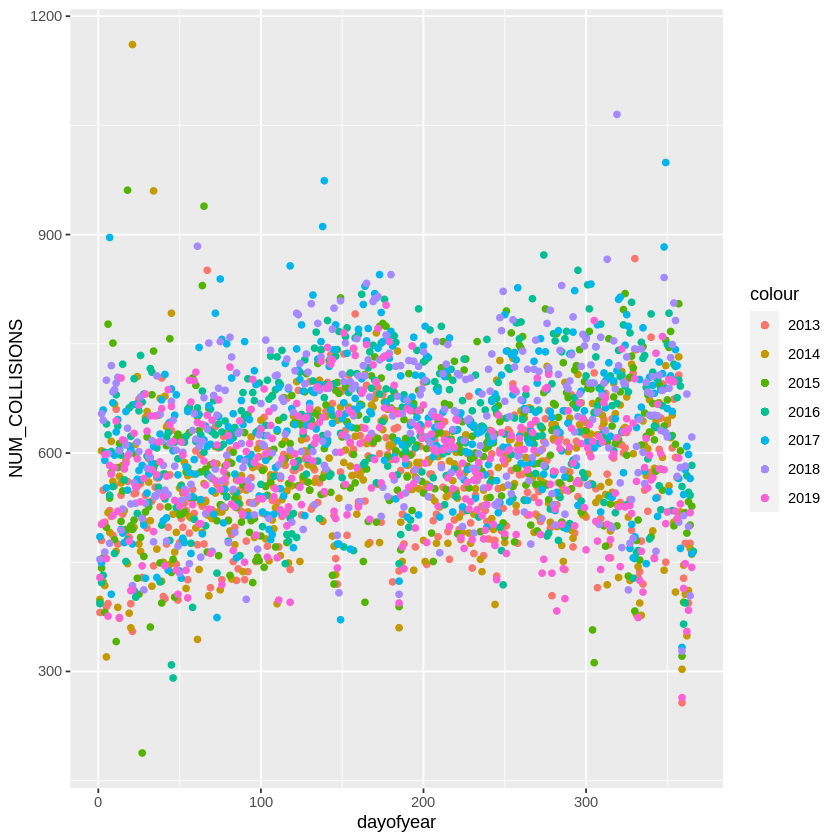

In [ ]:
ggplot() +
  geom_point(data=cs13a, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cs14a, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cs15a, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=cs16a, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cs17a, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cs18a, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cs19a, aes(dayofyear, NUM_COLLISIONS, color="2019"))

With all of the full years included in the dataset overlaid it is obvious there are many outliers or irregularities, however the seasonal pattern is still visible. By looking at only three years at a time some differences, a wider spread is noticeable in more recent years.

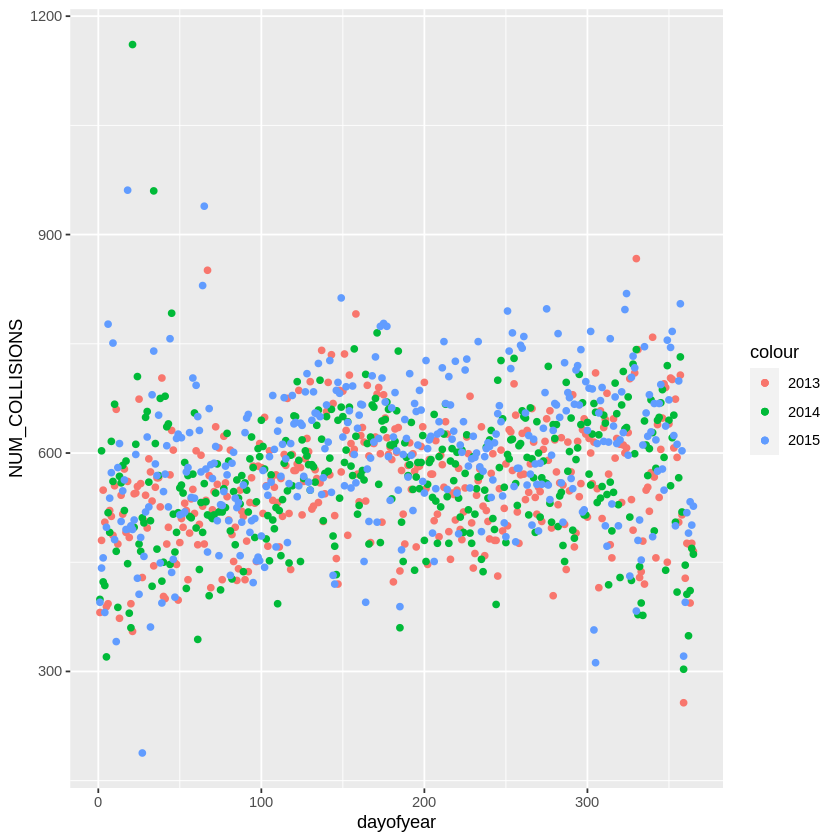

In [ ]:
ggplot() +
  geom_point(data=cs13a, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cs14a, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cs15a, aes(dayofyear, NUM_COLLISIONS, color="2015"))

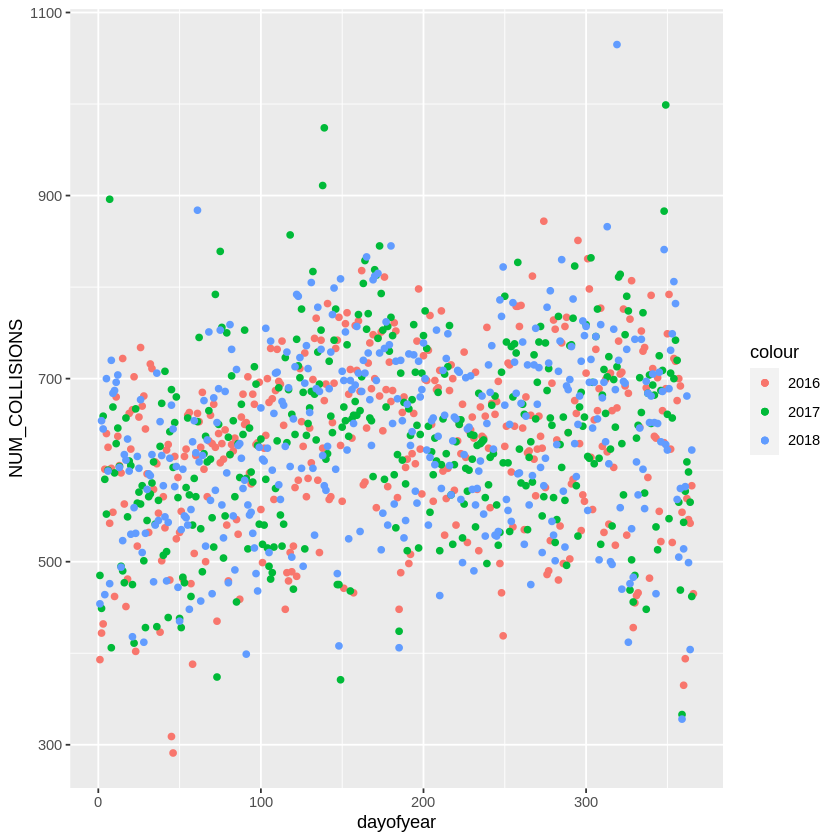

In [ ]:
ggplot() +
  geom_point(data=cs16a, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cs17a, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cs18a, aes(dayofyear, NUM_COLLISIONS, color="2018"))

This suggests a potential change in factors causing collisions in the latter years studied, as the number of collisions per day have risen slightly, with greater spread in numbers per day.

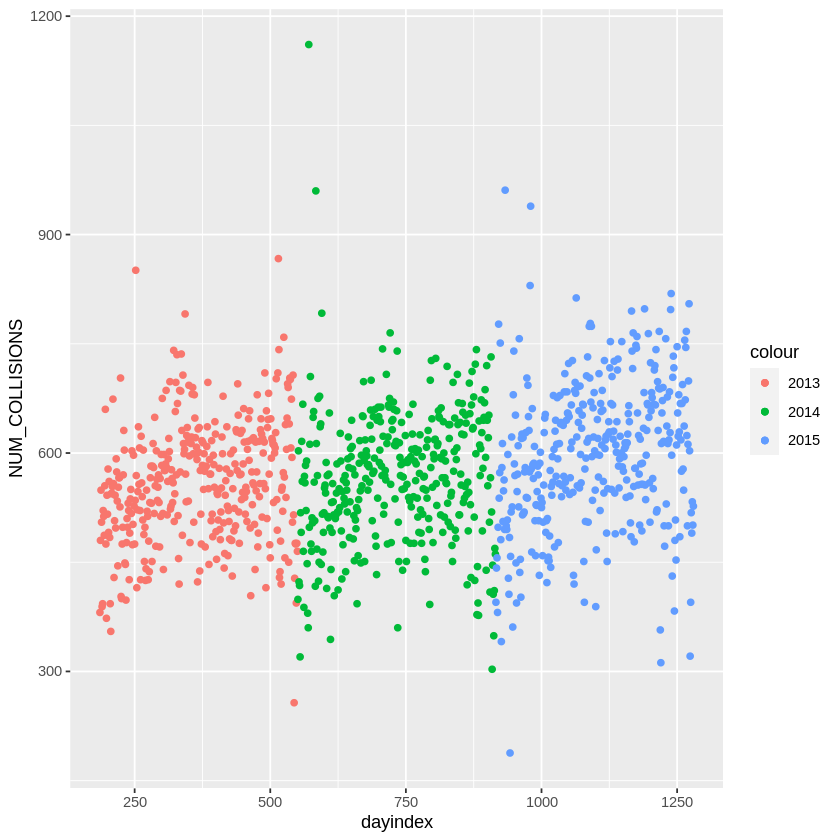

In [ ]:
ggplot() +
  geom_point(data=cs13a, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cs14a, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cs15a, aes(dayindex, NUM_COLLISIONS, color="2015"))

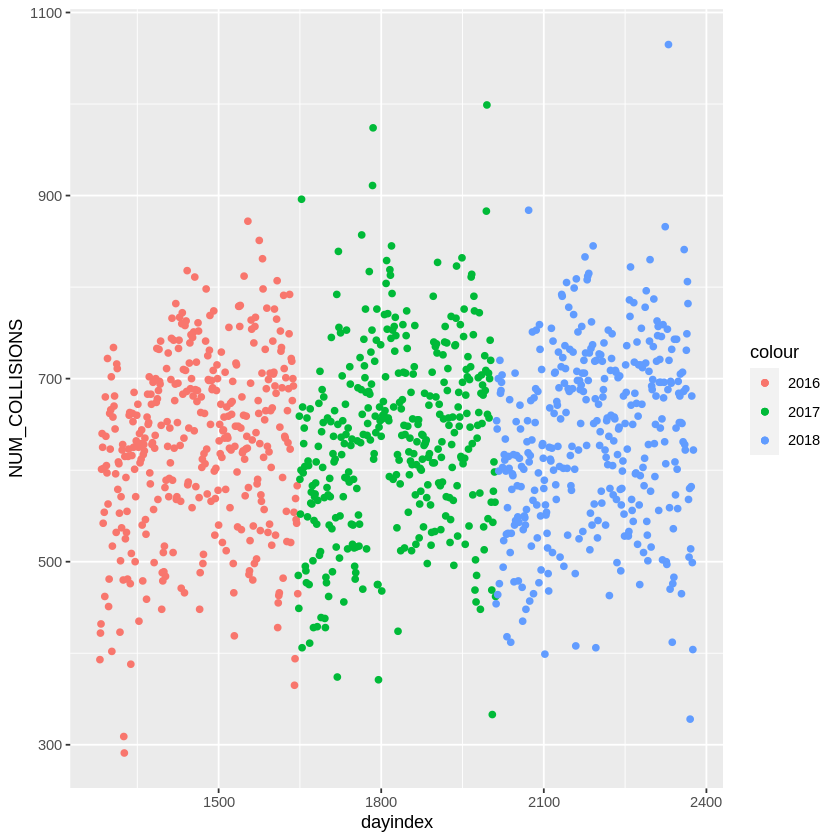

In [ ]:
ggplot() +
  geom_point(data=cs16a, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cs17a, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cs18a, aes(dayindex, NUM_COLLISIONS, color="2018"))

However, the plots above show that, despite the wider spread of collision numbers, the pattern remains similar, most notably the rise throughout the start of the year.

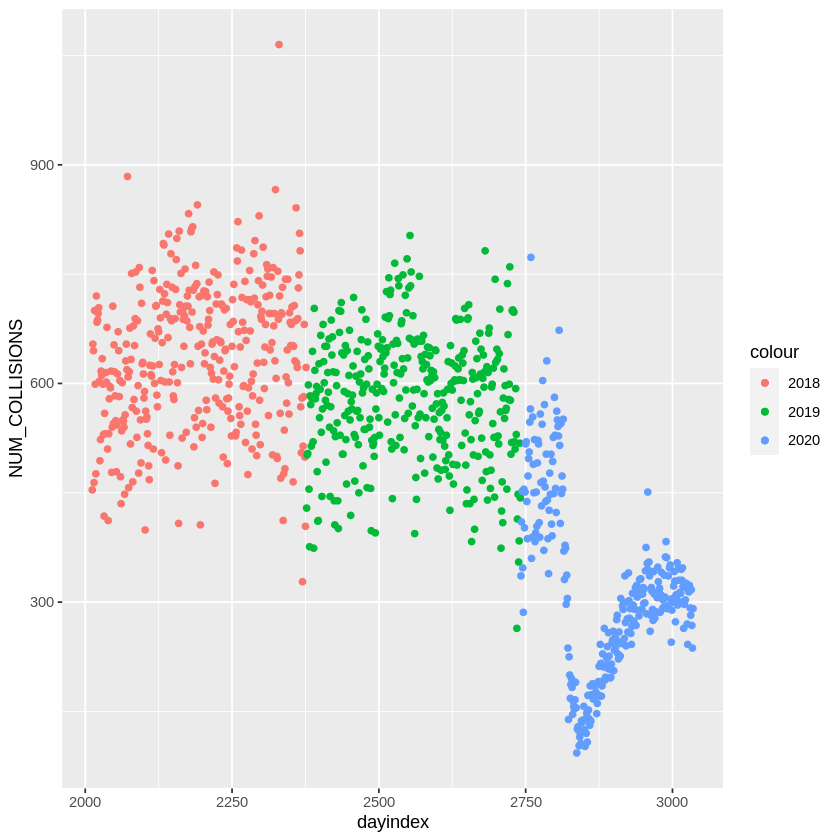

In [ ]:
ggplot() +
  geom_point(data=cs18a, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cs19a, aes(dayindex, NUM_COLLISIONS, color="2019")) +
  geom_point(data=cs20a, aes(dayindex, NUM_COLLISIONS, color="2020"))

This comparison of the last three years highlights the obvious issues with 2020's data, but also that 2019 introduced a change to the typical pattern, with a general decline in collisions throughout the year. Reasons for this could include the city's implementation of traffic restrictions in some of its busiest areas in order to priorities pedestrians (Hu, 2019). The correlation between road traffic and collisions is obvious, with the decline occurring during the second half of the year, following the implementation of these restrictions in August. While this year is a clear outlier, it still crucial to understanding the role of weather in collisions, if the city chooses to maintain these traffic restrictions.

It is clear there are large quantities of outliers present that are obscuring the data. By removing overly high and low values, the data becomes easier to read, although this is done cautiously to avoid removing more than necessary. 2020 was excluded from this cleansing due to its extreme fluctuations; the year itself can for the most part be considered an outlier and viewed in isolation.

In [ ]:
cs12b <- cs12a[which(cs12a$NUM_COLLISIONS >= 400), ]
cs13b <- cs13a[which(cs13a$NUM_COLLISIONS >= 375), ]
cs14b <- cs14a[which(cs14a$NUM_COLLISIONS >= 375), ]
cs15b <- cs15a[which(cs15a$NUM_COLLISIONS >= 375), ]
cs16b <- cs16a[which(cs16a$NUM_COLLISIONS >= 500), ]
cs17b <- cs17a[which(cs17a$NUM_COLLISIONS >= 500), ]
cs18b <- cs18a[which(cs18a$NUM_COLLISIONS >= 500), ]
cs19b <- cs19a[which(cs19a$NUM_COLLISIONS >= 400), ]
cs12c <- cs12b[which(cs12a$NUM_COLLISIONS >= 700), ]
cs13c <- cs13b[which(cs13b$NUM_COLLISIONS <= 675), ]
cs14c <- cs14b[which(cs14b$NUM_COLLISIONS <= 675), ]
cs15c <- cs15b[which(cs15b$NUM_COLLISIONS <= 750), ]
cs16c <- cs16b[which(cs16b$NUM_COLLISIONS <= 775), ]
cs17c <- cs17b[which(cs17b$NUM_COLLISIONS <= 775), ]
cs18c <- cs18b[which(cs18b$NUM_COLLISIONS <= 775), ]
cs19c <- cs19b[which(cs19b$NUM_COLLISIONS <= 750), ]

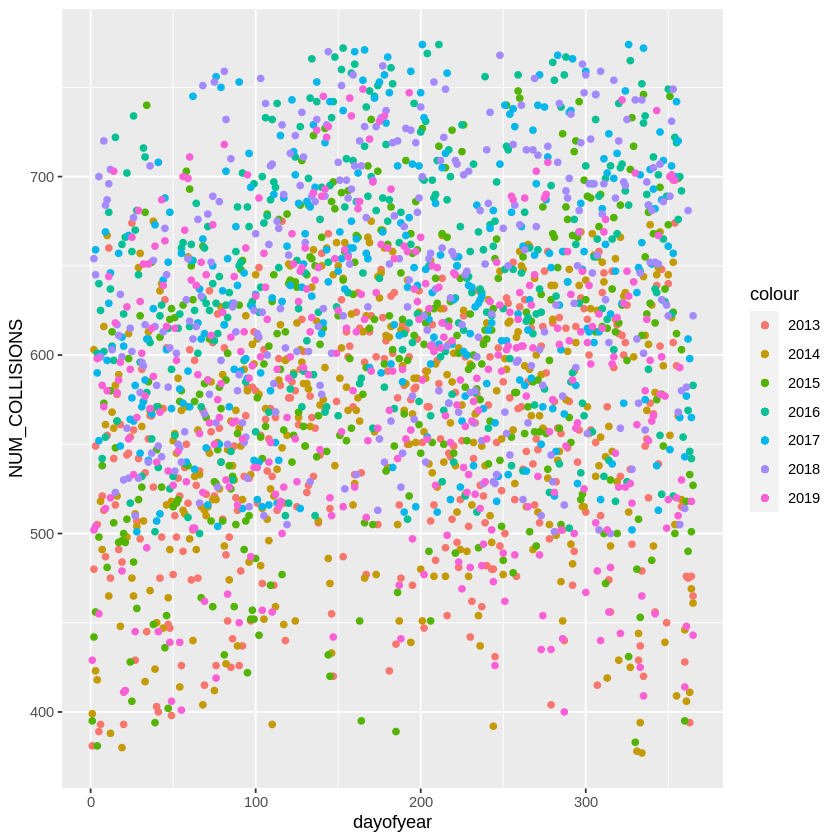

In [ ]:
ggplot() +
  geom_point(data=cs13c, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cs14c, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cs15c, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=cs16c, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cs17c, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cs18c, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cs19c, aes(dayofyear, NUM_COLLISIONS, color="2019"))

Viewing all of the complete years overlaid is still mostly unhelpful, but demonstrates better the divide between the earlier years studied and the later ones. By separating them below the effects of the removal of outliers are visible.

Warning message:
“Removed 28 rows containing missing values (geom_point).”


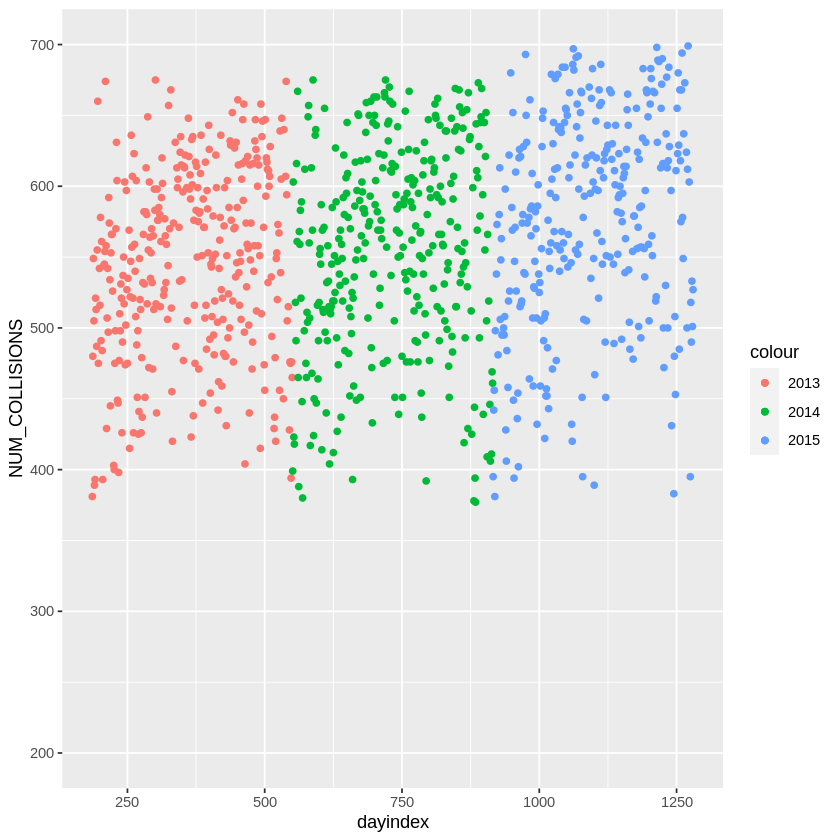

In [ ]:
sp <- ggplot() +
  geom_point(data=cs13c, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cs14c, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cs15c, aes(dayindex, NUM_COLLISIONS, color="2015"))

  sp+ylim(200, 700)

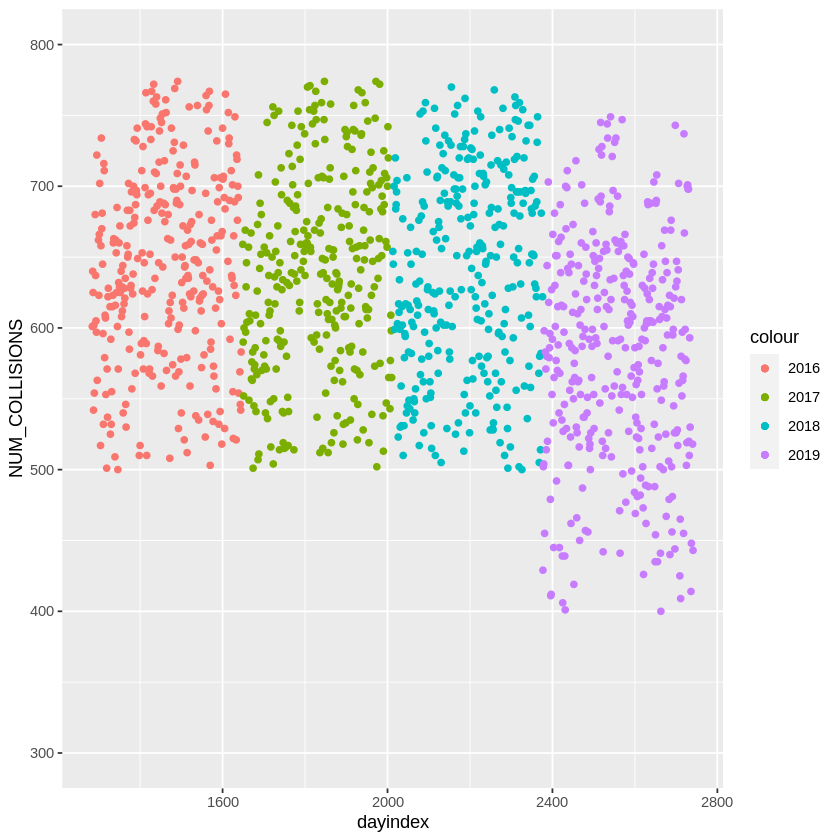

In [ ]:
sp <- ggplot() +
  geom_point(data=cs16c, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cs17c, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cs18c, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cs19c, aes(dayindex, NUM_COLLISIONS, color="2019"))  

  sp+ylim(300, 800)

The rising patterns are still visible (with the exception of 2019's falling pattern), and the variability has been mostly removed. While some outliers still remain, these are mostly seasonal outliers that would result in a loss of data from other parts of the year if the same broad method of removal was applied. For the purposes of this study, these outliers were kept and another method of managing this data was implemented.

In order to continue tidying the data and preparing it for eventual use with a linear regression model and use of neural network training, featuring scaling was used. Min-max normalisation was chosen as the scaling method, which utilises the following formula:

$$x = \frac{(x-xmin)}{(xmax-xmin)}$$

While this method of scaling can create problems when outliers are present, it is also useful for data without a more regular Gaussian distribution (Lakshmanan, 2019; Patterson & Gibson, 2017: 332), as demonstrated by the original dataset below:

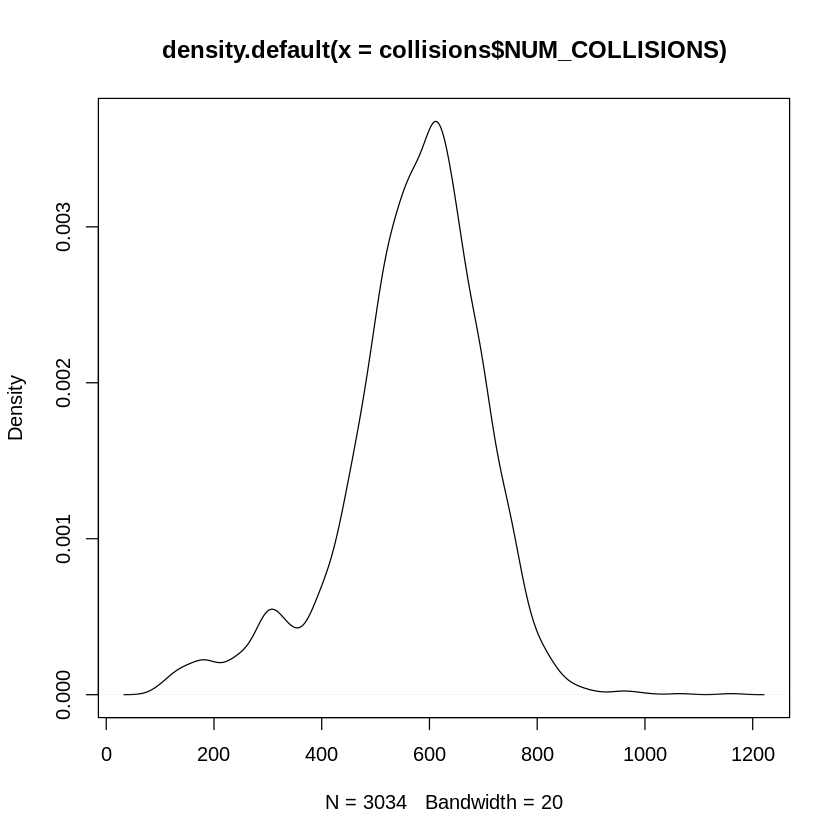

In [ ]:
plot(density(collisions$NUM_COLLISIONS))

The process of manual normalisation year by year is shown below, ultimately placing each value between 0 and 1.

In [ ]:
summary(cs12c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  449.0   486.5   507.5   529.5   584.8   623.0 

In [ ]:
summary(cs13c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  381.0   498.5   550.5   545.1   599.0   675.0 

In [ ]:
summary(cs14c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  377.0   508.5   561.5   555.0   611.8   675.0 

In [ ]:
summary(cs15c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  381.0   529.5   595.0   587.5   652.0   748.0 

In [ ]:
summary(cs16c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  500.0   596.2   644.0   643.1   695.0   774.0 

In [ ]:
summary(cs17c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  501.0   585.5   639.0   637.8   687.5   774.0 

In [ ]:
summary(cs18c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  500.0   580.5   645.5   639.9   698.8   770.0 

In [ ]:
summary(cs19c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  400.0   526.0   591.0   582.1   639.0   749.0 

In [ ]:
summary(cs20a$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   93.0   230.2   301.0   311.5   368.0   773.0 

In [ ]:
#Normalising 2012
cs12c$NUM_COLLISIONS <- (cs12c$NUM_COLLISIONS - 449)/(623 - 449)

In [ ]:
#Normalising 2013
cs13c$NUM_COLLISIONS <- (cs13c$NUM_COLLISIONS - 381)/(675 - 381)

In [ ]:
#Normalising 2014
cs14c$NUM_COLLISIONS <- (cs14c$NUM_COLLISIONS - 377)/(675 - 377)

In [ ]:
#Normalising 2015
cs15c$NUM_COLLISIONS <- (cs15c$NUM_COLLISIONS - 381)/(748 - 381)

In [ ]:
#Normalising 2016
cs16c$NUM_COLLISIONS <- (cs16c$NUM_COLLISIONS - 500)/(774 - 500)

In [ ]:
#Normalising 2017
cs17c$NUM_COLLISIONS <- (cs17c$NUM_COLLISIONS - 501)/(774 - 501)

In [ ]:
#Normalising 2018
cs18c$NUM_COLLISIONS <- (cs18c$NUM_COLLISIONS - 500)/(770 - 500)

In [ ]:
#Normalising 2019
cs19c$NUM_COLLISIONS <- (cs19c$NUM_COLLISIONS - 400)/(749 - 400)

In [ ]:
#Normalising 2020
cs20a$NUM_COLLISIONS <- (cs20a$NUM_COLLISIONS - 93)/(773 - 93)

The same yearly plots are shown below under normalisation, highlighting the much smaller values.

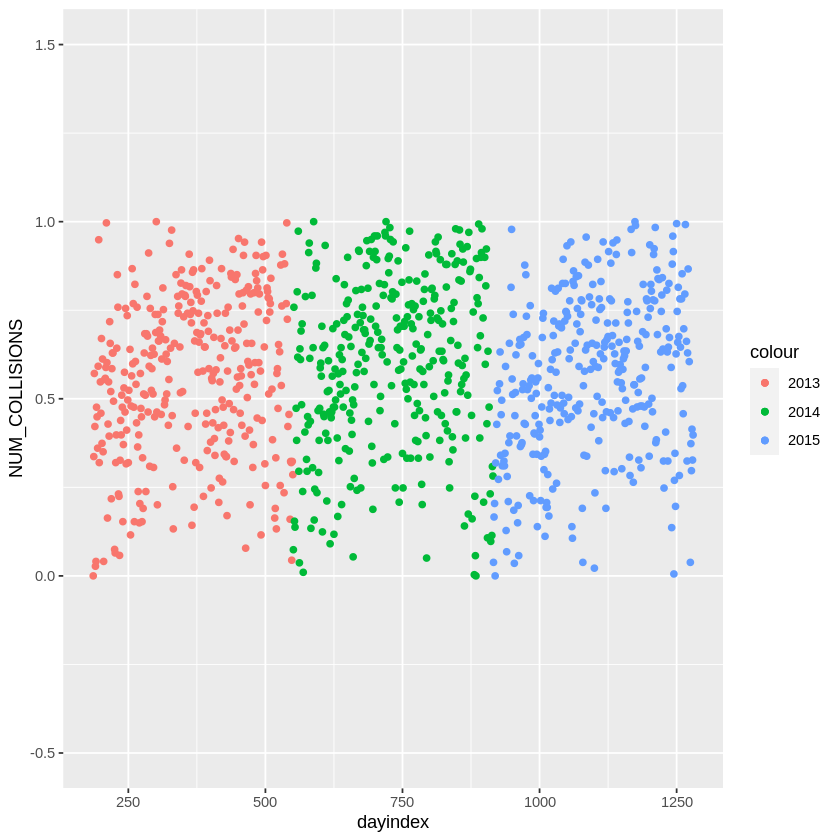

In [ ]:
sp <- ggplot() +
  geom_point(data=cs13c, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cs14c, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cs15c, aes(dayindex, NUM_COLLISIONS, color="2015"))

  sp+ylim(-0.5, 1.5)

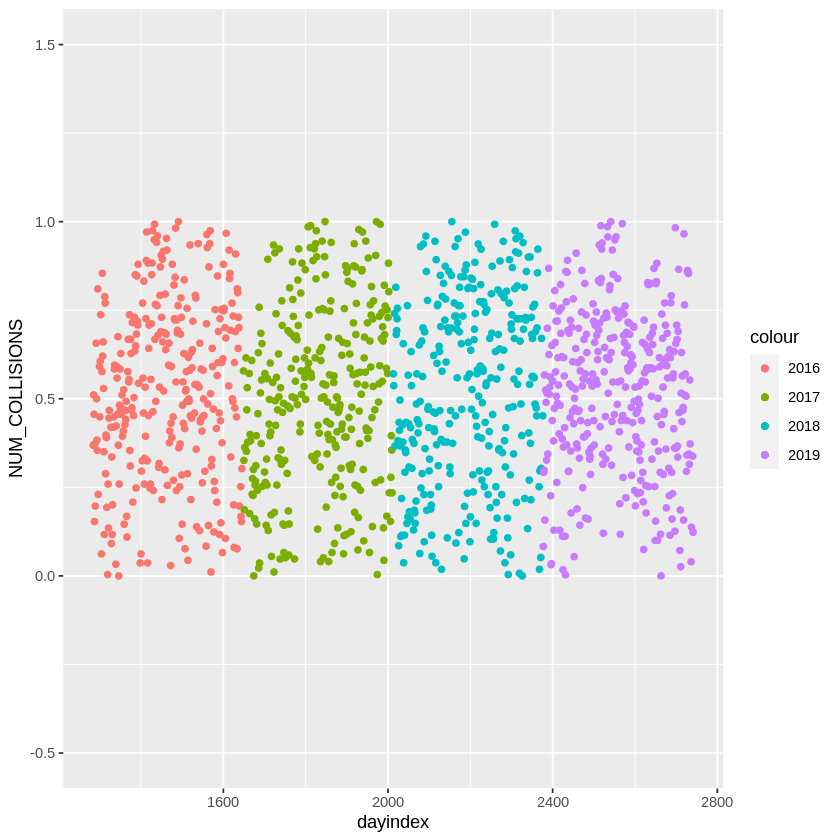

In [ ]:
sp <- ggplot() +
  geom_point(data=cs16c, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cs17c, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cs18c, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cs19c, aes(dayindex, NUM_COLLISIONS, color="2019"))

  sp+ylim(-0.5, 1.5)

## Combining the Data 

This separated data could be combined back into one full dataset, however, keeping in mind the changing patterns - from the wider spread in results after 2015, to the change from a rising pattern to a declining one in 2019, as well as 2020's unique pattern caused by COVID - it is more suitable to make multiple datasets, one for each pattern.

To check these patterns, below are correlations between each year and certain weather conditions.

In [ ]:
#Yearly correlation with temperature
cor(cs12c$temp, cs12c$NUM_COLLISIONS)
cor(cs13c$temp, cs13c$NUM_COLLISIONS)
cor(cs14c$temp, cs14c$NUM_COLLISIONS)
cor(cs15c$temp, cs15c$NUM_COLLISIONS)
cor(cs16c$temp, cs16c$NUM_COLLISIONS)
cor(cs17c$temp, cs17c$NUM_COLLISIONS)
cor(cs18c$temp, cs18c$NUM_COLLISIONS)
cor(cs19c$temp, cs19c$NUM_COLLISIONS)
cor(cs20a$temp, cs20a$NUM_COLLISIONS)

[1] -0.08736602

[1] 0.2323682

[1] 0.2406094

[1] 0.2819471

[1] 0.1707178

[1] 0.1780697

[1] 0.1248823

[1] 0.09645313

[1] -0.2733356

In [ ]:
#Yearly correlation with dew point
cor(cs12c$dewp, cs12c$NUM_COLLISIONS)
cor(cs13c$dewp, cs13c$NUM_COLLISIONS)
cor(cs14c$dewp, cs14c$NUM_COLLISIONS)
cor(cs15c$dewp, cs15c$NUM_COLLISIONS)
cor(cs16c$dewp, cs16c$NUM_COLLISIONS)
cor(cs17c$dewp, cs17c$NUM_COLLISIONS)
cor(cs18c$dewp, cs18c$NUM_COLLISIONS)
cor(cs19c$dewp, cs19c$NUM_COLLISIONS)
cor(cs20a$dewp, cs20a$NUM_COLLISIONS)

[1] -0.2700128

[1] 0.2033645

[1] 0.2175521

[1] 0.2629638

[1] 0.1572419

[1] 0.1467329

[1] 0.1248186

[1] 0.0827926

[1] -0.2320539

This confirms there are specific groupings of years with very similar results - one from 2013-15, and another from 2016-18, although 2018's correlation is slightly weaker. 2019 could potentially be included within this second group, however its declining pattern suggests it would be best kept separated. 2012's incomplete data continues to be a problem and can most likely be ignored from this point onward, while 2020 will be studied separately.

With this in mind, these year splits can now be combined into a few separate datasets to be used with further analysis tools.

In [ ]:
#Creating a dataset for 2013 to 2015
c1315 <- rbind(cs13c, cs14c, cs15c)

In [ ]:
c1315

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
185  186       1        2   2013 1   1 2013-01-01     38.0 25.6 1008.8 10.0 
186  187       2        3   2013 1   2 2013-01-02     27.5 12.1 1013.4 10.0 
187  188       3        4   2013 1   3 2013-01-03     21.8  7.8 1018.1 10.0 
188  189       4        5   2013 1   4 2013-01-04     32.2 21.1 1015.2 10.0 
189  190       5        6   2013 1   5 2013-01-05     37.3 24.5 1017.3 10.0 
190  191       6        7   2013 1   6 2013-01-06     35.7 31.3 1019.7  9.8 
191  192       7        1   2013 1   7 2013-01-07     35.9 31.0 1020.5  8.8 
192  193       8        2   2013 1   8 2013-01-08     39.8 34.1 1028.8  9.8 
193  194       9        3   2013 1   9 2013-01-09     39.9 37.6 1026.2  6.8 
194  195      10        4   2013 1  10 2013-01-10     43.5 30.4 1024.0  9.9 
195  196      11        5   2013 1  11 2013-01-11     38.0 31.4 1030.6 10.0 
196  197      12        6   2013 1  12 2013-01-12     42.7 41.5 1022.6  7.1 
198  199      14        1   2013 1  14 2013-01-14     47.2 47.1 1017.5  1.3 
199  200      15        2   2013 1  15 2013-01-15     42.3 38.3 1023.1  9.5 
200  201      16        3   2013 1  16 2013-01-16     41.6 40.0 1018.3  7.0 
201  202      17        4   2013 1  17 2013-01-17     39.4 34.6 1014.2  8.6 
202  203      18        5   2013 1  18 2013-01-18     28.1 16.6 1023.2  7.5 
203  204      19        6   2013 1  19 2013-01-19     35.9 26.6 1026.4  9.2 
204  205      20        7   2013 1  20 2013-01-20     46.3 41.2 1010.0  7.0 
206  207      22        2   2013 1  22 2013-01-22     26.3 18.1 1011.1  6.5 
207  208      23        3   2013 1  23 2013-01-23     16.2 -1.1 1018.6 10.0 
208  209      24        4   2013 1  24 2013-01-24     14.3 -1.9 1018.7 10.0 
209  210      25        5   2013 1  25 2013-01-25     19.0  3.3 1023.1 10.0 
210  211      26        6   2013 1  26 2013-01-26     24.4 16.6 1016.4  8.6 
211  212      27        7   2013 1  27 2013-01-27     21.7  4.7 1025.6 10.0 
212  213      28        1   2013 1  28 2013-01-28     27.3 10.8 1028.9  8.8 
213  214      29        2   2013 1  29 2013-01-29     35.4 34.9 1019.0  2.6 
214  215      30        3   2013 1  30 2013-01-30     45.1 44.0 1013.9  4.4 
215  216      31        4   2013 1  31 2013-01-31     46.5 40.3  995.5  5.9 
216  217      32        5   2013 2   1 2013-02-01     33.1 15.5 1007.0 10.0 
⋮    ⋮        ⋮         ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮    
1246 1247     332       6   2015 11 28 2015-11-28     54.5 50.4 1021.1  9.1 
1247 1248     333       7   2015 11 29 2015-11-29     46.1 38.8 1022.1  9.6 
1248 1249     334       1   2015 11 30 2015-11-30     40.5 26.7 1029.5 10.0 
1249 1250     335       2   2015 12  1 2015-12-01     40.1 32.7 1027.0  9.3 
1250 1251     336       3   2015 12  2 2015-12-02     53.6 51.9 1012.2  2.3 
1251 1252     337       4   2015 12  3 2015-12-03     53.5 47.1 1005.8  6.4 
1252 1253     338       5   2015 12  4 2015-12-04     45.6 32.0 1024.3 10.0 
1253 1254     339       6   2015 12  5 2015-12-05     45.6 34.0 1035.5 10.0 
1254 1255     340       7   2015 12  6 2015-12-06     45.4 40.9 1032.5  8.5 
1255 1256     341       1   2015 12  7 2015-12-07     50.8 45.5 1020.7  8.0 
1256 1257     342       2   2015 12  8 2015-12-08     47.4 42.3 1016.7  7.8 
1257 1258     343       3   2015 12  9 2015-12-09     43.7 32.9 1021.0 10.0 
1258 1259     344       4   2015 12 10 2015-12-10     51.1 46.4 1017.5  9.0 
1259 1260     345       5   2015 12 11 2015-12-11     52.2 50.0 1014.0  6.1 
1260 1261     346       6   2015 12 12 2015-12-12     55.0 46.1 1017.8  8.1 
1261 1262     347       7   2015 12 13 2015-12-13     53.6 46.9 1021.0  8.1 
1262 1263     348       1   2015 12 14 2015-12-14     52.6 48.2 1016.4  6.7 
1264 1265     350       3   2015 12 16 2015-12-16     46.5 35.5 1015.3 10.0 
1265 1266     351       4   2015 12 17 2015-12-17     48.9 43.7 1019.4  8.8 
1267 1268     353       6   2015 12 19 2015-12-19     42.1 24.9 1014.0 10.0 
1

In [ ]:
#Creating a dataset for 2016 to 2018
c1618 <- rbind(cs16c, cs17c, cs18c)

In [ ]:
c1618

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
1283 1284      4        1   2016 1   4 2016-01-04     38.2 27.4 1011.5 10.0 
1284 1285      5        2   2016 1   5 2016-01-05     27.7 18.1 1028.5  7.9 
1285 1286      6        3   2016 1   6 2016-01-06     33.5 19.3 1033.1 10.0 
1286 1287      7        4   2016 1   7 2016-01-07     40.5 29.9 1026.9 10.0 
1287 1288      8        5   2016 1   8 2016-01-08     41.3 33.1 1022.3  9.9 
1288 1289      9        6   2016 1   9 2016-01-09     45.9 38.6 1022.7 10.0 
1290 1291     11        1   2016 1  11 2016-01-11     43.2 30.5 1005.5  8.4 
1291 1292     12        2   2016 1  12 2016-01-12     33.0 19.1 1015.4 10.0 
1292 1293     13        3   2016 1  13 2016-01-13     32.9 18.2 1005.8  9.6 
1293 1294     14        4   2016 1  14 2016-01-14     28.9 14.7 1013.1  8.1 
1294 1295     15        5   2016 1  15 2016-01-15     36.5 25.6 1014.8 10.0 
1295 1296     16        6   2016 1  16 2016-01-16     45.7 42.5  999.0  7.3 
1298 1299     19        2   2016 1  19 2016-01-19     25.5  4.8 1007.1 10.0 
1299 1300     20        3   2016 1  20 2016-01-20     29.4 11.2 1014.4 10.0 
1300 1301     21        4   2016 1  21 2016-01-21     30.9 10.8 1015.8 10.0 
1301 1302     22        5   2016 1  22 2016-01-22     28.0 11.8 1020.4 10.0 
1303 1304     24        7   2016 1  24 2016-01-24     34.5 27.9 1005.7  6.3 
1304 1305     25        1   2016 1  25 2016-01-25     33.5 21.2 1021.4 10.0 
1305 1306     26        2   2016 1  26 2016-01-26     42.2 36.4 1021.5  9.1 
1306 1307     27        3   2016 1  27 2016-01-27     43.0 36.7 1014.0  7.5 
1307 1308     28        4   2016 1  28 2016-01-28     35.0 24.4 1016.1 10.0 
1308 1309     29        5   2016 1  29 2016-01-29     41.3 36.8  999.4 10.0 
1309 1310     30        6   2016 1  30 2016-01-30     37.8 27.3 1011.0 10.0 
1310 1311     31        7   2016 1  31 2016-01-31     45.0 39.0 1014.8  8.6 
1311 1312     32        1   2016 2   1 2016-02-01     47.6 43.1 1009.6  6.9 
1312 1313     33        2   2016 2   2 2016-02-02     43.2 32.2 1021.5 10.0 
1313 1314     34        3   2016 2   3 2016-02-03     42.6 37.8 1025.6  9.5 
1314 1315     35        4   2016 2   4 2016-02-04     51.6 49.4 1015.2  3.1 
1315 1316     36        5   2016 2   5 2016-02-05     40.8 38.4 1012.4  3.5 
1316 1317     37        6   2016 2   6 2016-02-06     32.3 23.3 1026.1  9.9 
⋮    ⋮        ⋮         ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮    
2338 2339     328       6   2018 11 24 2018-11-24     41.4 31.9 1023.6 10.0 
2340 2341     330       1   2018 11 26 2018-11-26     45.4 42.8 1011.9  7.8 
2341 2342     331       2   2018 11 27 2018-11-27     46.9 42.2  993.6  7.2 
2342 2343     332       3   2018 11 28 2018-11-28     41.0 30.4  992.9 10.0 
2343 2344     333       4   2018 11 29 2018-11-29     41.3 29.0 1002.8 10.0 
2344 2345     334       5   2018 11 30 2018-11-30     38.4 30.1 1015.2 10.0 
2345 2346     335       6   2018 12  1 2018-12-01     38.3 31.9 1020.3  9.9 
2346 2347     336       7   2018 12  2 2018-12-02     46.0 44.1 1015.9  5.1 
2347 2348     337       1   2018 12  3 2018-12-03     51.0 49.0 1001.7  2.7 
2348 2349     338       2   2018 12  4 2018-12-04     40.6 28.1 1007.8 10.0 
2349 2350     339       3   2018 12  5 2018-12-05     31.6 20.6 1017.3 10.0 
2350 2351     340       4   2018 12  6 2018-12-06     34.9 20.5 1018.3 10.0 
2351 2352     341       5   2018 12  7 2018-12-07     38.0 22.5 1022.0  9.8 
2352 2353     342       6   2018 12  8 2018-12-08     27.9  7.7 1028.6 10.0 
2354 2355     344       1   2018 12 10 2018-12-10     35.5 23.8 1018.4 10.0 
2355 2356     345       2   2018 12 11 2018-12-11     32.0 22.9 1019.5 10.0 
2356 2357     346       3   2018 12 12 2018-12-12     32.3 22.3 1015.0  8.9 
2357 2358     347       4   2018 12 13 2018-12-13     30.9 18.7 1030.2 10.0 
2359 2360     349       6   2018 12 15 2018-12-15     46.1 44.8 1022.3  5.7 
2360 2361     350       7   2018 12 16 2018-12-16     43.8 37.8 1017.9  8.4 
2

In [ ]:
#Creating a dataset for 2019
c19 <- rbind(cs19c)

In [ ]:
c19

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
2376 2377      1        2   2019 1   1 2019-01-01     47.4 41.6 1009.2  5.4 
2377 2378      2        3   2019 1   2 2019-01-02     35.0 23.4 1022.9 10.0 
2378 2379      3        4   2019 1   3 2019-01-03     39.4 32.9 1015.6  9.5 
2379 2380      4        5   2019 1   4 2019-01-04     39.0 30.2 1014.4  9.8 
2380 2381      5        6   2019 1   5 2019-01-05     43.8 42.4 1005.8  5.0 
2382 2383      7        1   2019 1   7 2019-01-07     27.4 11.7 1024.8 10.0 
2383 2384      8        2   2019 1   8 2019-01-08     36.3 30.8 1025.7  6.7 
2384 2385      9        3   2019 1   9 2019-01-09     44.4 39.6  997.6  5.6 
2385 2386     10        4   2019 1  10 2019-01-10     34.9 21.2  998.6  9.7 
2386 2387     11        5   2019 1  11 2019-01-11     28.6 13.4 1013.9 10.0 
2387 2388     12        6   2019 1  12 2019-01-12     23.1  3.7 1029.0 10.0 
2389 2390     14        1   2019 1  14 2019-01-14     32.8 22.5 1021.6 10.0 
2390 2391     15        2   2019 1  15 2019-01-15     29.4 18.7 1017.5 10.0 
2391 2392     16        3   2019 1  16 2019-01-16     31.3 23.1 1017.3  9.8 
2392 2393     17        4   2019 1  17 2019-01-17     29.4 15.0 1024.6 10.0 
2393 2394     18        5   2019 1  18 2019-01-18     33.2 28.1 1023.0  8.3 
2394 2395     19        6   2019 1  19 2019-01-19     34.5 29.7 1022.0  9.8 
2395 2396     20        7   2019 1  20 2019-01-20     43.2 42.4 1012.4  2.8 
2396 2397     21        1   2019 1  21 2019-01-21     13.7  6.3 1003.4  7.0 
2397 2398     22        2   2019 1  22 2019-01-22     15.8 -2.3 1026.7 10.0 
2398 2399     23        3   2019 1  23 2019-01-23     31.6 23.8 1029.6  9.4 
2399 2400     24        4   2019 1  24 2019-01-24     46.5 44.7 1012.6  5.2 
2400 2401     25        5   2019 1  25 2019-01-25     37.0 28.5 1010.5  8.9 
2401 2402     26        6   2019 1  26 2019-01-26     30.5 15.4 1022.6 10.0 
2402 2403     27        7   2019 1  27 2019-01-27     35.1 28.2 1021.8  9.9 
2403 2404     28        1   2019 1  28 2019-01-28     35.7 27.3 1016.0  9.8 
2404 2405     29        2   2019 1  29 2019-01-29     33.8 23.7 1016.7 10.0 
2405 2406     30        3   2019 1  30 2019-01-30     36.8 29.5 1009.8  8.8 
2406 2407     31        4   2019 1  31 2019-01-31     15.7  1.9 1022.5  9.5 
2407 2408     32        5   2019 2   1 2019-02-01     17.6 -1.7 1027.8  9.8 
⋮    ⋮        ⋮         ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮    
2706 2707     331       3   2019 11 27 2019-11-27     48.5 46.0 1016.5  6.0 
2708 2709     333       5   2019 11 29 2019-11-29     40.5 30.5 1015.6 10.0 
2709 2710     334       6   2019 11 30 2019-11-30     35.0 18.3 1013.2 10.0 
2710 2711     335       7   2019 12  1 2019-12-01     36.7 26.8 1014.3 10.0 
2711 2712     336       1   2019 12  2 2019-12-02     44.8 41.3  996.1  4.3 
2712 2713     337       2   2019 12  3 2019-12-03     39.9 36.3  990.8  5.2 
2713 2714     338       3   2019 12  4 2019-12-04     36.6 27.4  998.7 10.0 
2714 2715     339       4   2019 12  5 2019-12-05     39.6 30.2 1002.0 10.0 
2715 2716     340       5   2019 12  6 2019-12-06     38.3 25.4 1016.2 10.0 
2716 2717     341       6   2019 12  7 2019-12-07     36.4 25.7 1022.2 10.0 
2717 2718     342       7   2019 12  8 2019-12-08     31.8 19.5 1032.5 10.0 
2718 2719     343       1   2019 12  9 2019-12-09     48.2 43.6 1024.0  7.3 
2719 2720     344       2   2019 12 10 2019-12-10     53.1 51.0 1010.4  1.8 
2720 2721     345       3   2019 12 11 2019-12-11     39.9 36.7 1020.1  4.9 
2721 2722     346       4   2019 12 12 2019-12-12     31.1 19.7 1034.8 10.0 
2723 2724     348       6   2019 12 14 2019-12-14     52.7 51.3 1010.4  3.1 
2724 2725     349       7   2019 12 15 2019-12-15     47.7 38.4 1001.7  8.0 
2725 2726     350       1   2019 12 16 2019-12-16     35.4 19.8 1020.9 10.0 
2726 2727     351       2   2019 12 17 2019-12-17     37.5 32.0 1012.7  7.3 
2727 2728     352       3   2019 12 18 2019-12-18     39.3 35.2 1004.4  7.6 
2

In [ ]:
#Creating a dataset for 2020
c20 <- rbind(cs20a)

In [ ]:
c20

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
2741 2742      1        3   2020 1   1 2020-01-01     40.3 29.9 1003.0 10.0 
2742 2743      2        4   2020 1   2 2020-01-02     39.6 28.9 1011.8 10.0 
2743 2744      3        5   2020 1   3 2020-01-03     45.8 42.9 1010.3  7.0 
2744 2745      4        6   2020 1   4 2020-01-04     45.4 43.9 1005.6  3.6 
2745 2746      5        7   2020 1   5 2020-01-05     40.1 33.8 1001.6  7.1 
2746 2747      6        1   2020 1   6 2020-01-06     33.5 24.0 1013.2  9.9 
2747 2748      7        2   2020 1   7 2020-01-07     39.0 26.6 1016.6 10.0 
2748 2749      8        3   2020 1   8 2020-01-08     37.2 31.1 1009.8  8.4 
2749 2750      9        4   2020 1   9 2020-01-09     29.5 10.8 1030.7 10.0 
2750 2751     10        5   2020 1  10 2020-01-10     39.7 32.2 1036.6  9.3 
2751 2752     11        6   2020 1  11 2020-01-11     49.4 46.1 1028.6  6.7 
2752 2753     12        7   2020 1  12 2020-01-12     52.0 49.4 1017.2  2.9 
2753 2754     13        1   2020 1  13 2020-01-13     42.5 37.0 1029.6  9.5 
2754 2755     14        2   2020 1  14 2020-01-14     41.5 37.7 1026.2  8.8 
2755 2756     15        3   2020 1  15 2020-01-15     43.9 38.3 1019.4  8.2 
2756 2757     16        4   2020 1  16 2020-01-16     40.4 34.3 1010.7  6.6 
2757 2758     17        5   2020 1  17 2020-01-17     27.1 10.8 1023.8 10.0 
2758 2759     18        6   2020 1  18 2020-01-18     23.5 14.3 1032.4  9.6 
2759 2760     19        7   2020 1  19 2020-01-19     41.2 35.8 1004.9  7.5 
2760 2761     20        1   2020 1  20 2020-01-20     28.1 16.1 1015.1 10.0 
2761 2762     21        2   2020 1  21 2020-01-21     27.8 15.2 1026.8 10.0 
2762 2763     22        3   2020 1  22 2020-01-22     27.1 14.3 1029.8 10.0 
2763 2764     23        4   2020 1  23 2020-01-23     32.3 26.5 1029.2  9.7 
2764 2765     24        5   2020 1  24 2020-01-24     37.3 33.7 1028.5  6.5 
2765 2766     25        6   2020 1  25 2020-01-25     43.1 39.6 1023.5  9.0 
2766 2767     26        7   2020 1  26 2020-01-26     44.3 40.7 1006.4  6.5 
2767 2768     27        1   2020 1  27 2020-01-27     40.1 33.8 1004.3 10.0 
2768 2769     28        2   2020 1  28 2020-01-28     39.4 28.8 1005.1 10.0 
2769 2770     29        3   2020 1  29 2020-01-29     35.3 22.5 1013.1 10.0 
2770 2771     30        4   2020 1  30 2020-01-30     31.6 19.4 1023.4 10.0 
⋮    ⋮        ⋮         ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮    
3005 3006     265       1   2020  9 21 2020-09-21     56.8 37.0 1032.3 10.0 
3006 3007     266       2   2020  9 22 2020-09-22     58.8 40.4 1016.3 10.0 
3007 3008     267       3   2020  9 23 2020-09-23     64.1 48.2 1006.9 10.0 
3008 3009     268       4   2020  9 24 2020-09-24     66.2 56.9 1013.2 10.0 
3009 3010     269       5   2020  9 25 2020-09-25     64.6 61.0 1018.5  7.0 
3010 3011     270       6   2020  9 26 2020-09-26     63.6 60.9 1020.5  4.5 
3011 3012     271       7   2020  9 27 2020-09-27     66.7 63.0 1017.6  9.2 
3012 3013     272       1   2020  9 28 2020-09-28     68.1 66.3 1016.0  6.3 
3013 3014     273       2   2020  9 29 2020-09-29     67.5 65.8   90.0  6.1 
3014 3015     274       3   2020  9 30 2020-09-30     67.6 64.2 1006.2  7.7 
3015 3016     275       4   2020 10  1 2020-10-01     66.4 62.2 1013.7  9.7 
3016 3017     276       5   2020 10  2 2020-10-02     64.8 59.0 1013.1  8.7 
3017 3018     277       6   2020 10  3 2020-10-03     61.4 47.8 1021.2 10.0 
3018 3019     278       7   2020 10  4 2020-10-04     61.0 51.5 1024.2 10.0 
3019 3020     279       1   2020 10  5 2020-10-05     56.9 54.6 1019.7  9.2 
3020 3021     280       2   2020 10  6 2020-10-06     59.2 53.1 1020.5  9.9 
3021 3022     281       3   2020 10  7 2020-10-07     65.7 60.4 1007.0  9.6 
3022 3023     282       4   2020 10  8 2020-10-08     59.5 41.1 1008.9 10.0 
3023 3024     283       5   2020 10  9 2020-10-09     52.5 34.2 1022.0 10.0 
3024 3025     284       6   2020 10 10 2020-10-10     65.2 56.4 1016.3  9.9 
3

With these datasets created and conflicting data patterns separated, it is now easier to see correlations and similarities.

As shown below with temperature, the 2013-15 set shows a decent positive correlation, while 2016-18's is similar, but slightly lower.

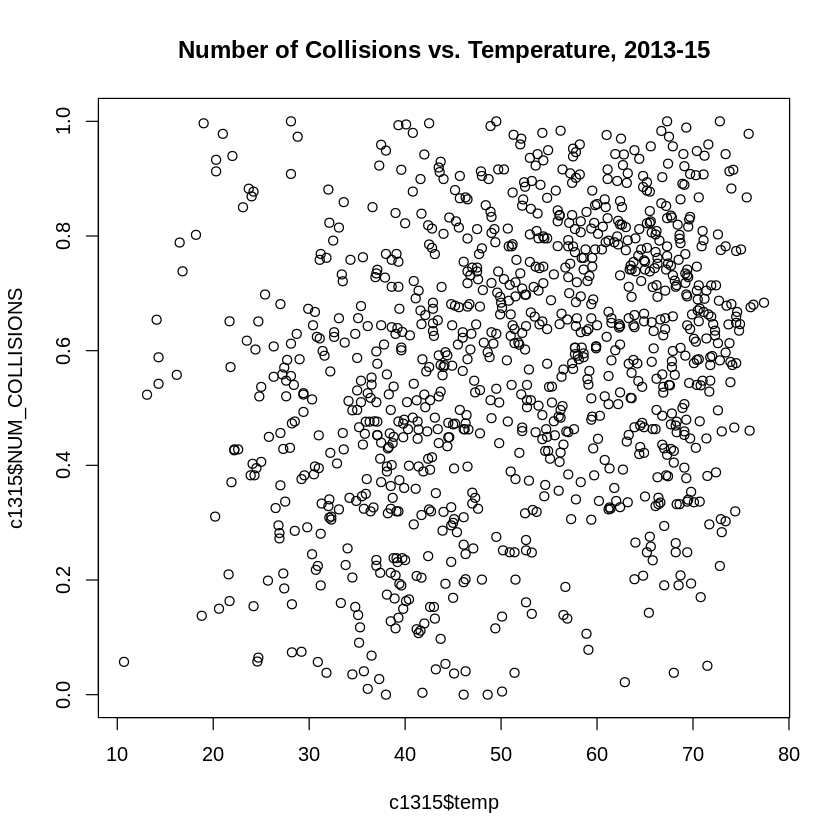

In [ ]:
plot(c1315$temp, c1315$NUM_COLLISIONS, main="Number of Collisions vs. Temperature, 2013-15")

In [ ]:
cor(c1315$temp, c1315$NUM_COLLISIONS)

[1] 0.2486309

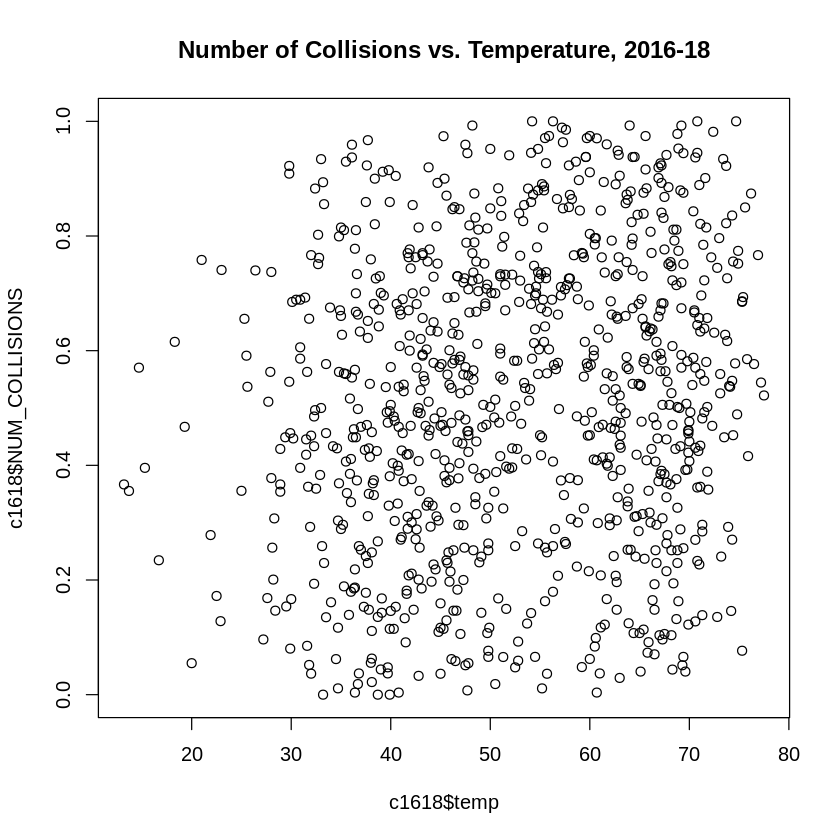

In [ ]:
plot(c1618$temp, c1618$NUM_COLLISIONS, main="Number of Collisions vs. Temperature, 2016-18")

In [ ]:
cor(c1618$temp, c1618$NUM_COLLISIONS)

[1] 0.1570045

It can be seen from this data that collisions increase as the temperature increases, suggesting that warmer times of year encourage more traffic on the roads - potentially through increased tourism and trips outdoors. Colder weather on the other hand, is more likely to encourage drivers to stay home.

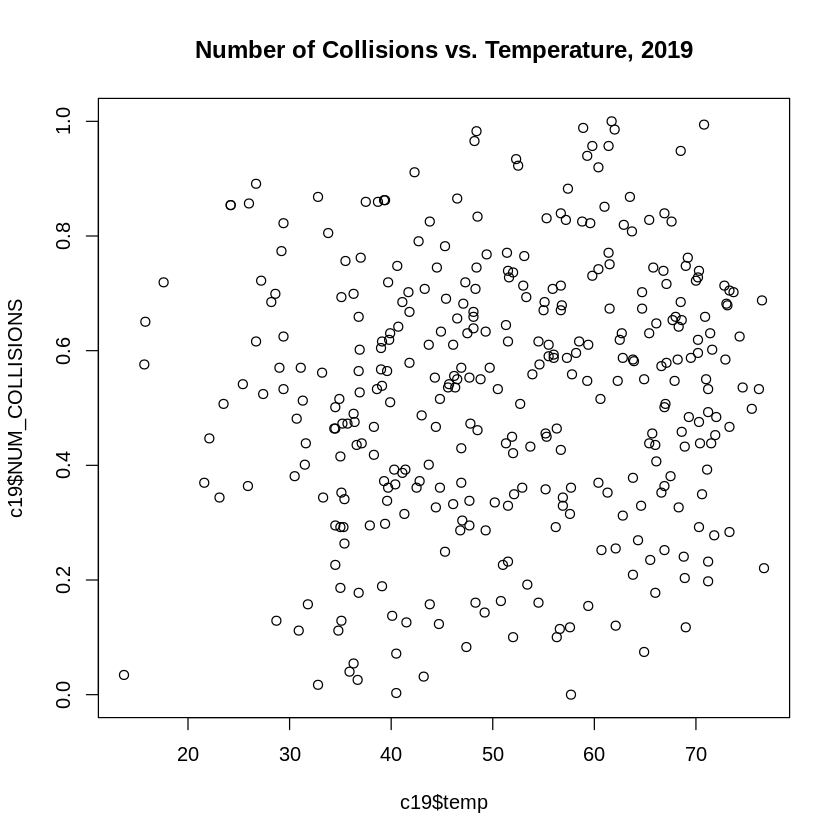

In [ ]:
plot(c19$temp, c19$NUM_COLLISIONS, main="Number of Collisions vs. Temperature, 2019")

In [ ]:
cor(c19$temp, c19$NUM_COLLISIONS)

[1] 0.09645313

2019's data is less conclusive. Some positive correlation remains, however, it can be assumed that due to traffic restrictions encouraging more pedestrian areas as previously noted, collisions may be more evenly spread and not so heavily affected by weather conditions. Looking at the higher density points suggests the temperature/collisions link is still present, with lower density among the outliers near the lower end of the temperature scale.

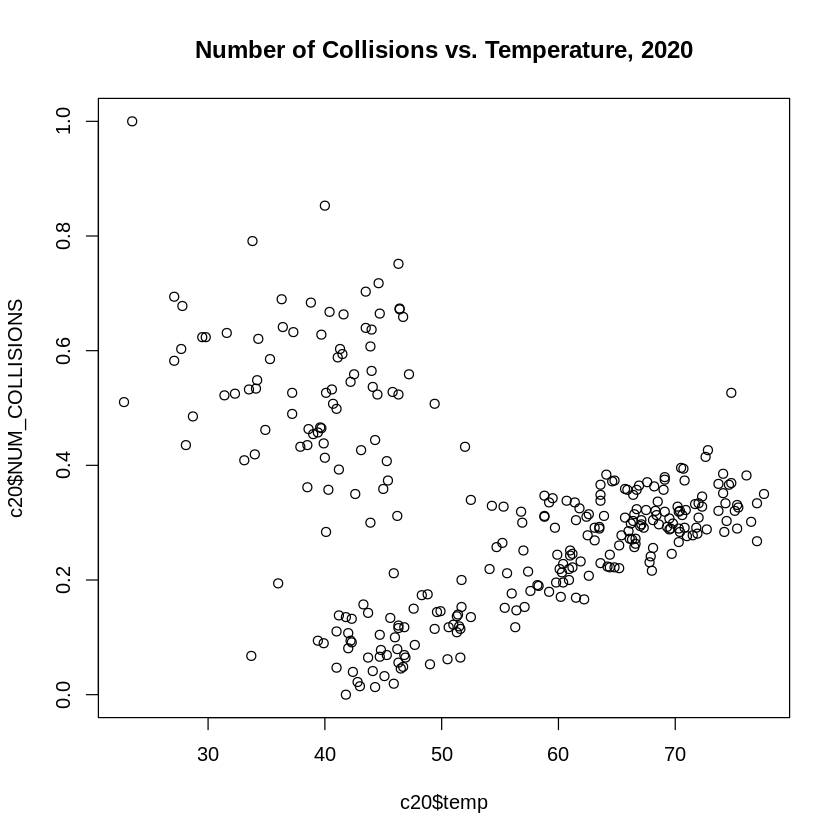

In [ ]:
plot(c20$temp, c20$NUM_COLLISIONS, main="Number of Collisions vs. Temperature, 2020")

In [ ]:
cor(c20$temp, c20$NUM_COLLISIONS)

[1] -0.2733356

Data for 2020 on the other hand is muddled but fairly conclusive. As examined previously, the lower ascending pattern shows data from the end of March onward, i.e. the number of collisions from New York City's lockdown onward, while the other data to the left of the chart shows something resembling close to the previous years' data. With only three months of data, this section of data is mostly unhelpful. In isolation, the data from March onward presents a more useful view.

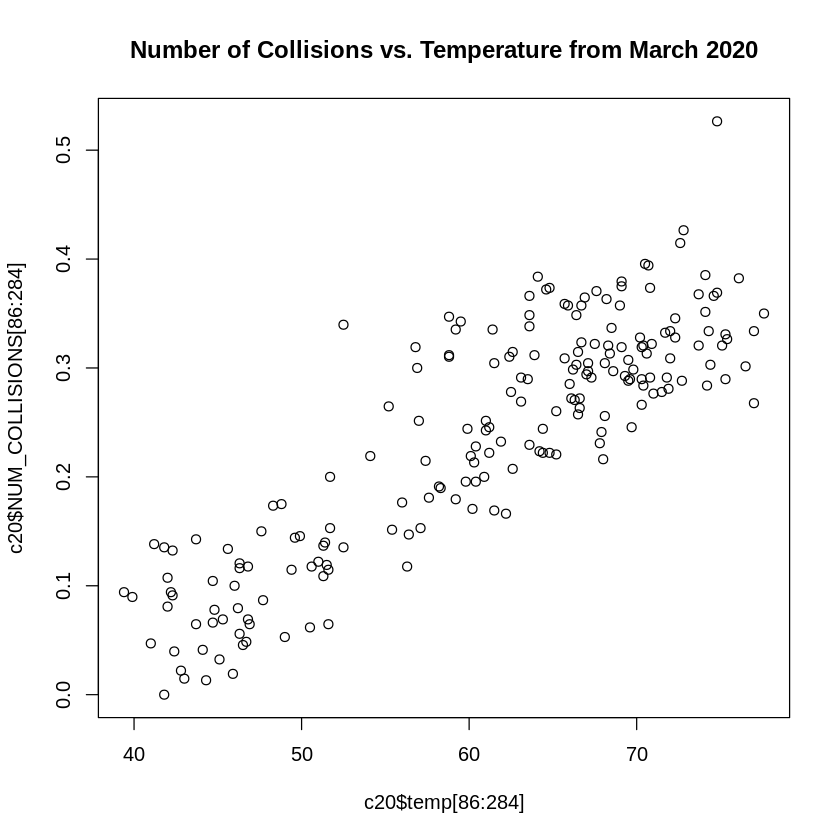

In [ ]:
plot(c20$temp[86:284], c20$NUM_COLLISIONS[86:284], main="Number of Collisions vs. Temperature from March 2020")

In [ ]:
cor(c20$temp[86:284], c20$NUM_COLLISIONS[86:284])

[1] 0.8669773

A very strong correlation is now evident. However, it is difficult to measure whether this increase is purely to do with temperature, or if it simply demonstrates how lockdown restrictions were lessened as the year progressed into warmer months. This can be examined below.

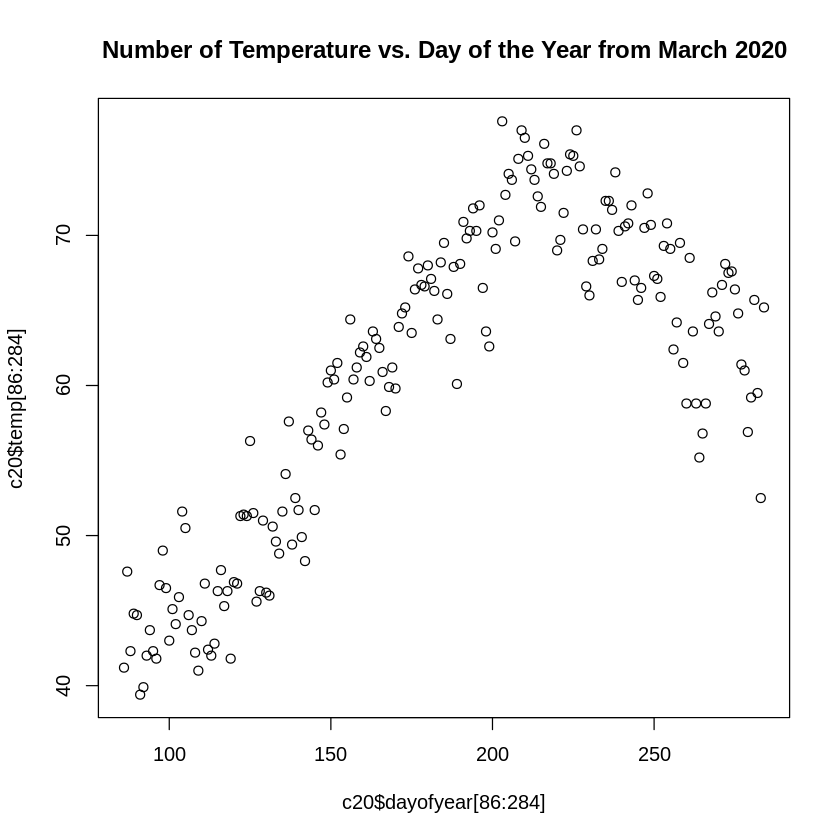

In [ ]:
plot(c20$dayofyear[86:284], c20$temp[86:284], main="Number of Temperature vs. Day of the Year from March 2020")

The temperature does clearly rise throughout the year, but hits its peak around August and falls thereafter. This suggests that, while the easing of restrictions did likely increase traffic collisions, temperature also played an important role by putting more drivers and pedestrians on roads. Further evidence for this is displayed below.

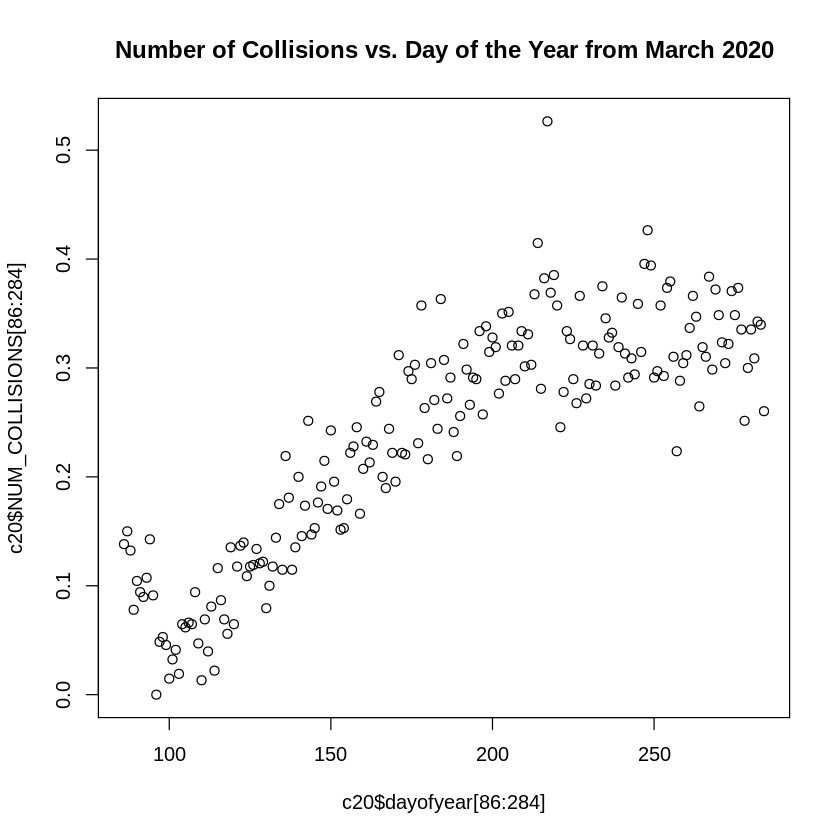

In [ ]:
plot(c20$dayofyear[86:284], c20$NUM_COLLISIONS[86:284], main="Number of Collisions vs. Day of the Year from March 2020")

The number of collisions also seems to reach its peak around mid-August and plateaus from there onward. With no major changes in lockdown restrictions in the city in August, it appears conclusive that temperature's role is significant in causing collisions. Perhaps if it had continued to increase into September more collisions would be present, but as the number of collisions ceases to grow as the temperature ceases to increase, these two values are most likely closely linked.

The other weather factor with the most positive correlation is dew point. For the most part this value mirrors temperature as the two are closely linked - as the temperature increases so does the dew point, as it relates closely to humidity.

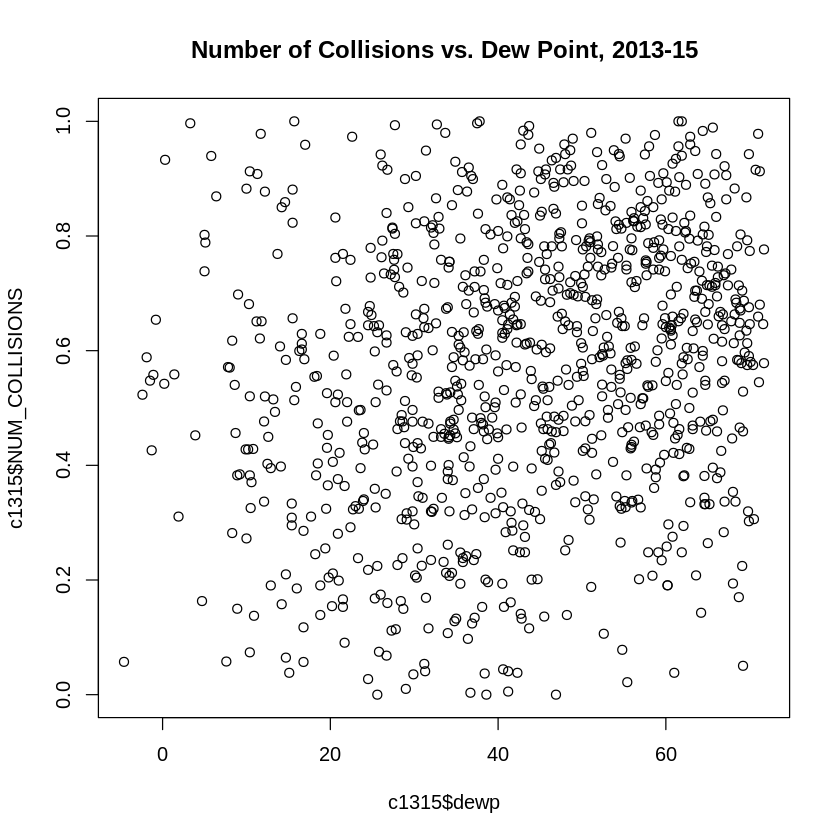

In [ ]:
plot(c1315$dewp, c1315$NUM_COLLISIONS, main="Number of Collisions vs. Dew Point, 2013-15")

In [ ]:
cor(c1315$dewp, c1315$NUM_COLLISIONS)

[1] 0.2250467

For these years it demonstrates a very similar correlation between these same years and temperature.

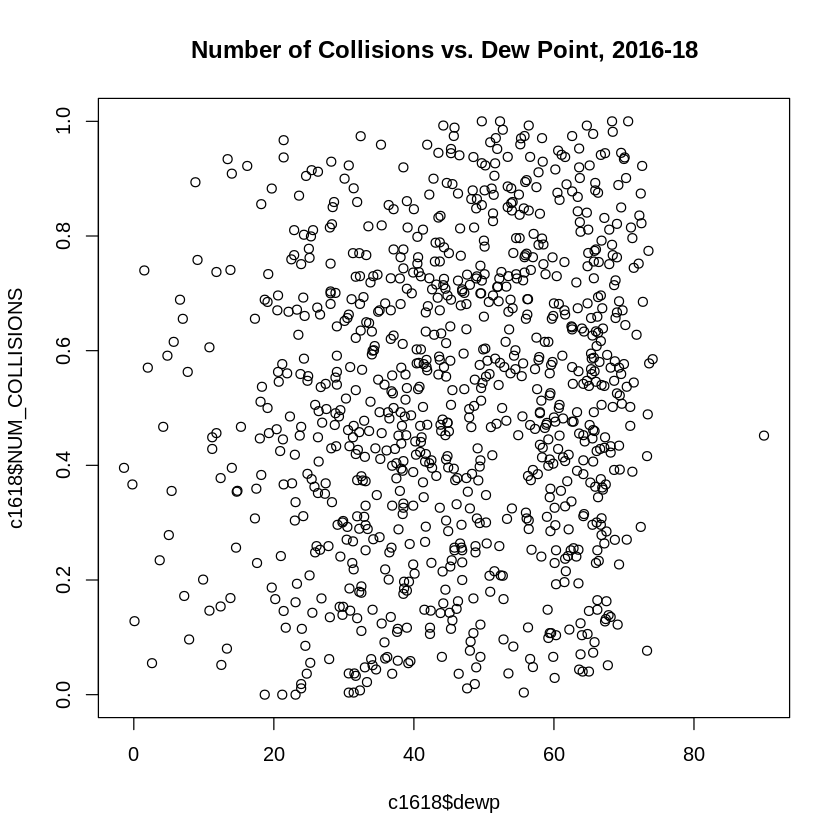

In [ ]:
plot(c1618$dewp, c1618$NUM_COLLISIONS, main="Number of Collisions vs. Dew Point, 2016-18")

In [ ]:
cor(c1618$dewp, c1618$NUM_COLLISIONS)

[1] 0.1419152

A similar pattern is shown in 2016 to 2018.

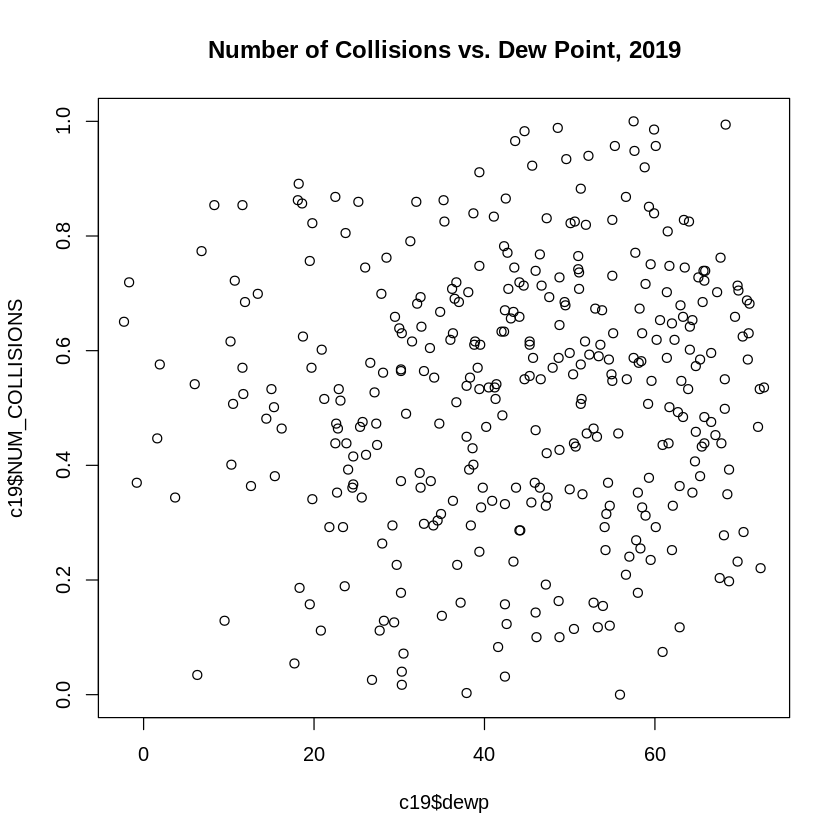

In [ ]:
plot(c19$dewp, c19$NUM_COLLISIONS, main="Number of Collisions vs. Dew Point, 2019")

In [ ]:
cor(c19$dewp, c19$NUM_COLLISIONS)

[1] 0.0827926

Again, a slightly weak but still present correlation is present in 2019.

For 2020, knowing now that the relationship between collisions and temperature was not purely incidental due to COVID restrictions, the same can be assumed with dew point. 

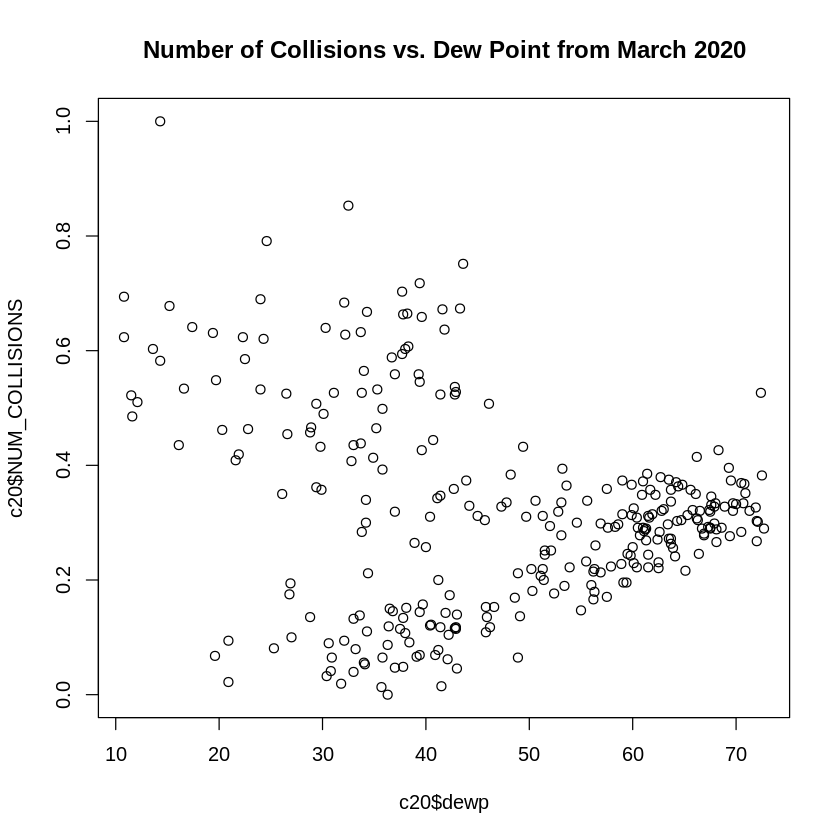

In [ ]:
plot(c20$dewp, c20$NUM_COLLISIONS, main="Number of Collisions vs. Dew Point from March 2020")

In [ ]:
cor(c20$dewp, c20$NUM_COLLISIONS)

[1] -0.2320539

Again, a poor relationship when viewing an overview of the year, but vastly improved when looking at post-COVID lockdown data in isolation.

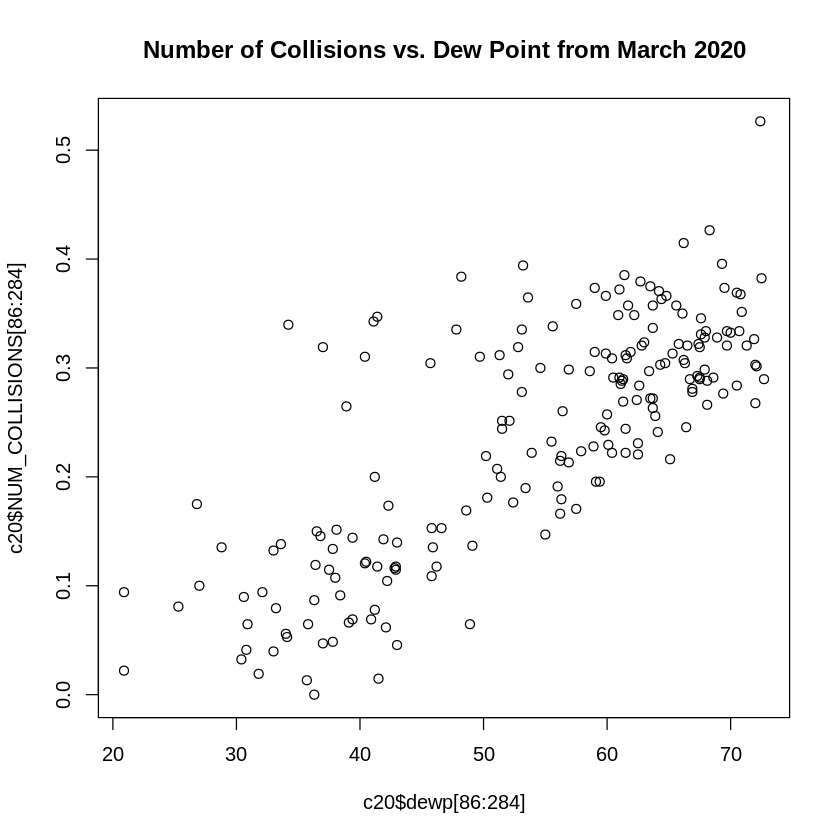

In [ ]:
plot(c20$dewp[86:284], c20$NUM_COLLISIONS[86:284], main="Number of Collisions vs. Dew Point from March 2020")

In [ ]:
cor(c20$dewp[86:284], c20$NUM_COLLISIONS[86:284])

[1] 0.779031

Having experimented with other factors included in the data set with little success, it is clear that temperature and dew point are the only conclusive factors in contributing to the volume of traffic collisions and can be used with linear regression and neural networking methods to begin to make predictions on the subject of collisions.

Maximum and minimum temperature also show positive correlations (shown below), however, there is little variation as the temperature value simply reflects the mean. Thus little examination is required in addition to that already carried out above, although these values will be included in the collated datasets to use with the mentioned prediction tools.

In [ ]:
cor(c1315$min, c1315$NUM_COLLISIONS)
cor(c1618$min, c1618$NUM_COLLISIONS)
cor(c19$min, c19$NUM_COLLISIONS)
cor(c20$min, c20$NUM_COLLISIONS)
cor(c20$min[86:284], c20$NUM_COLLISIONS[86:284])

[1] 0.2512759

[1] 0.1543114

[1] 0.1169736

[1] -0.2545919

[1] 0.8442067

In [ ]:
cor(c1315$max, c1315$NUM_COLLISIONS)
cor(c1618$max, c1618$NUM_COLLISIONS)
cor(c19$max, c19$NUM_COLLISIONS)
cor(c20$max, c20$NUM_COLLISIONS)
cor(c20$max[86:284], c20$NUM_COLLISIONS[86:284])

[1] 0.2500376

[1] 0.1579427

[1] 0.07657877

[1] -0.2664184

[1] 0.8216669

Both full 2020 and post-March 2020 data is shown above to highlight the difference, and by this point it is clear that the first few months up to lockdown restrictions can be removed. This will be useful not only for showing strong correlations, but also to show what the data may look like if COVID restrictions continue to affect the city.

In summary, this will leave four main datasets to use in further analysis. The first, 2013-2015, showing older, more constrained data; the second, 2016-18, showing a wider spread of data; the third, 2019, showing collisions under new temporary restrictions and highlighting what this data could look like in the future if these are to stay in place after COVID is managed; and the final, 2020, showing what collision data may continue to look like until COVID is brought under control.

In [ ]:
#Removing January to late March entries for 2020
c20b <- c20[which(c20$dayofyear >= 86), ]

In [ ]:
head(c1315)

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
185 186      1         2   2013 1  1  2013-01-01     38.0 25.6 1008.8 10.0 
186 187      2         3   2013 1  2  2013-01-02     27.5 12.1 1013.4 10.0 
187 188      3         4   2013 1  3  2013-01-03     21.8  7.8 1018.1 10.0 
188 189      4         5   2013 1  4  2013-01-04     32.2 21.1 1015.2 10.0 
189 190      5         6   2013 1  5  2013-01-05     37.3 24.5 1017.3 10.0 
190 191      6         7   2013 1  6  2013-01-06     35.7 31.3 1019.7  9.8 
    wdsp mxpsd gust max  min  prcp sndp fog NUM_COLLISIONS
185 15.0 21.0  28.0 41.0 33.1 0.00 0    0   0.00000000    
186 12.4 15.9  25.1 33.1 21.9 0.00 0    0   0.33673469    
187  9.8 18.1  24.1 28.9 16.0 0.00 0    0   0.57142857    
188 11.3 22.0  29.9 41.0 24.1 0.00 0    0   0.42176871    
189 13.2 20.0  28.0 42.1 30.9 0.00 0    0   0.02721088    
190  5.9 15.0  20.0 44.1 23.0 0.01 0    0   0.04081633

In [ ]:
#Creating linear regression data for 2013-15
linearregressiondata1315 <- c1315[,c(3,5,8,9,15,16,20)]

In [ ]:
head(linearregressiondata1315)

day mo temp dewp max  min  NUM_COLLISIONS
185 2   1  38.0 25.6 41.0 33.1 0.00000000    
186 3   1  27.5 12.1 33.1 21.9 0.33673469    
187 4   1  21.8  7.8 28.9 16.0 0.57142857    
188 5   1  32.2 21.1 41.0 24.1 0.42176871    
189 6   1  37.3 24.5 42.1 30.9 0.02721088    
190 7   1  35.7 31.3 44.1 23.0 0.04081633

In [ ]:
write.csv(linearregressiondata1315, file="/content/lineardata1315.csv")

In [ ]:
head(c1618)

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
1283 1284     4         1   2016 1  4  2016-01-04     38.2 27.4 1011.5 10.0 
1284 1285     5         2   2016 1  5  2016-01-05     27.7 18.1 1028.5  7.9 
1285 1286     6         3   2016 1  6  2016-01-06     33.5 19.3 1033.1 10.0 
1286 1287     7         4   2016 1  7  2016-01-07     40.5 29.9 1026.9 10.0 
1287 1288     8         5   2016 1  8  2016-01-08     41.3 33.1 1022.3  9.9 
1288 1289     9         6   2016 1  9  2016-01-09     45.9 38.6 1022.7 10.0 
     wdsp mxpsd gust max  min  prcp sndp fog NUM_COLLISIONS
1283 13.5 24.1  31.1 52.0 34.0 0    0    0   0.3686131     
1284 20.3 28.9  39.0 43.0 24.1 0    0    0   0.5109489     
1285  8.3 17.1   0.0 45.0 21.0 0    0    0   0.4562044     
1286  6.8 13.0   0.0 46.9 24.1 0    0    0   0.1532847     
1287 11.8 20.0  28.0 48.0 30.9 0    0    0   0.3722628     
1288  9.3 15.9  21.0 50.0 30.9 0    0    0   0.1970803

In [ ]:
#Creating linear regression data for 2016-18
linearregressiondata1618 <- c1618[,c(3,5,8,9,15,16,20)]

In [ ]:
head(linearregressiondata1618)

day mo temp dewp max  min  NUM_COLLISIONS
1283 1   1  38.2 27.4 52.0 34.0 0.3686131     
1284 2   1  27.7 18.1 43.0 24.1 0.5109489     
1285 3   1  33.5 19.3 45.0 21.0 0.4562044     
1286 4   1  40.5 29.9 46.9 24.1 0.1532847     
1287 5   1  41.3 33.1 48.0 30.9 0.3722628     
1288 6   1  45.9 38.6 50.0 30.9 0.1970803

In [ ]:
write.csv(linearregressiondata1618, file="/content/lineardata1618.csv")

In [ ]:
head(c19)

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
2376 2377     1         2   2019 1  1  2019-01-01     47.4 41.6 1009.2  5.4 
2377 2378     2         3   2019 1  2  2019-01-02     35.0 23.4 1022.9 10.0 
2378 2379     3         4   2019 1  3  2019-01-03     39.4 32.9 1015.6  9.5 
2379 2380     4         5   2019 1  4  2019-01-04     39.0 30.2 1014.4  9.8 
2380 2381     5         6   2019 1  5  2019-01-05     43.8 42.4 1005.8  5.0 
2382 2383     7         1   2019 1  7  2019-01-07     27.4 11.7 1024.8 10.0 
     wdsp mxpsd gust max  min  prcp sndp fog NUM_COLLISIONS
2376 18.3 29.9  41.0 54.0 39.9 0.84 0    1   0.08309456    
2377 10.3 14.0  24.1 55.0 28.0 0.61 0    0   0.29226361    
2378  9.2 19.0  24.1 46.9 28.0 0.00 0    0   0.29799427    
2379  9.9 18.1  26.0 46.9 30.9 0.01 0    0   0.56733524    
2380 11.8 21.0  31.1 46.9 30.9 0.25 0    0   0.15759312    
2382 17.4 22.0  31.1 45.0 21.9 0.00 0    0   0.52435530

In [ ]:
#Creating linear regression data for 2019
linearregressiondata19 <- c19[,c(3,5,8,9,15,16,20)]

In [ ]:
head(linearregressiondata19)

day mo temp dewp max  min  NUM_COLLISIONS
2376 2   1  47.4 41.6 54.0 39.9 0.08309456    
2377 3   1  35.0 23.4 55.0 28.0 0.29226361    
2378 4   1  39.4 32.9 46.9 28.0 0.29799427    
2379 5   1  39.0 30.2 46.9 30.9 0.56733524    
2380 6   1  43.8 42.4 46.9 30.9 0.15759312    
2382 1   1  27.4 11.7 45.0 21.9 0.52435530

In [ ]:
write.csv(linearregressiondata19, file="/content/lineardata19.csv")

In [ ]:
head(c20b)

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
2826 2827     86        4   2020 3  26 2020-03-26     41.2 33.6 1013.0 9.7  
2827 2828     87        5   2020 3  27 2020-03-27     47.6 36.5 1009.0 9.7  
2828 2829     88        6   2020 3  28 2020-03-28     42.3 33.0 1020.4 9.9  
2829 2830     89        7   2020 3  29 2020-03-29     44.8 41.2 1019.0 7.8  
2830 2831     90        1   2020 3  30 2020-03-30     44.7 42.2 1011.5 5.3  
2831 2832     91        2   2020 3  31 2020-03-31     39.4 32.1 1015.0 9.2  
     wdsp mxpsd gust max  min  prcp sndp fog NUM_COLLISIONS
2826 17.3 22.9  29.9 46.9 36.0 0.11 0    1   0.13823529    
2827 11.3 18.1   0.0 59.0 35.1 0.02 0    0   0.15000000    
2828  5.8  9.9   0.0 59.0 30.0 0.00 0    1   0.13235294    
2829 15.2 22.9  33.0 53.1 30.0 0.34 0    1   0.07794118    
2830 15.2 20.0  28.0 48.9 39.9 0.05 0    1   0.10441176    
2831 15.5 20.0  26.0 48.9 34.0 0.01 0    1   0.09411765

In [ ]:
#Creating linear regression data for 2020
linearregressiondata20 <- c20b[,c(3,5,8,9,15,16,20)]

In [ ]:
head(linearregressiondata20)

day mo temp dewp max  min  NUM_COLLISIONS
2826 4   3  41.2 33.6 46.9 36.0 0.13823529    
2827 5   3  47.6 36.5 59.0 35.1 0.15000000    
2828 6   3  42.3 33.0 59.0 30.0 0.13235294    
2829 7   3  44.8 41.2 53.1 30.0 0.07794118    
2830 1   3  44.7 42.2 48.9 39.9 0.10441176    
2831 2   3  39.4 32.1 48.9 34.0 0.09411765

In [ ]:
write.csv(linearregressiondata20, file="/content/lineardata20.csv")

While these created CSV files are prepared for use with a linear regressor, some additional modifications can be made in order to create datasets better suited for use with a deep learning neural network. Below demonstrates the use of relabelling numerical month and date values in text form for clarity, followed by the use of one-hot encoding to apply binary values.

In [ ]:
#2013-15
c1315$mo[c1315$mo == 1] <- 'Jan'
c1315$mo[c1315$mo == 2] <- 'Feb'
c1315$mo[c1315$mo == 3] <- 'Mar'
c1315$mo[c1315$mo == 4] <- 'Apr'
c1315$mo[c1315$mo == 5] <- 'May'
c1315$mo[c1315$mo == 6] <- 'Jun'
c1315$mo[c1315$mo == 7] <- 'Jul'
c1315$mo[c1315$mo == 8] <- 'Aug'
c1315$mo[c1315$mo == 9] <- 'Sep'
c1315$mo[c1315$mo == 10] <- 'Oct'
c1315$mo[c1315$mo == 11] <- 'Nov'
c1315$mo[c1315$mo == 12] <- 'Dec'
#2016-18
c1618$mo[c1618$mo == 1] <- 'Jan'
c1618$mo[c1618$mo == 2] <- 'Feb'
c1618$mo[c1618$mo == 3] <- 'Mar'
c1618$mo[c1618$mo == 4] <- 'Apr'
c1618$mo[c1618$mo == 5] <- 'May'
c1618$mo[c1618$mo == 6] <- 'Jun'
c1618$mo[c1618$mo == 7] <- 'Jul'
c1618$mo[c1618$mo == 8] <- 'Aug'
c1618$mo[c1618$mo == 9] <- 'Sep'
c1618$mo[c1618$mo == 10] <- 'Oct'
c1618$mo[c1618$mo == 11] <- 'Nov'
c1618$mo[c1618$mo == 12] <- 'Dec'
#2019
c19$mo[c19$mo == 1] <- 'Jan'
c19$mo[c19$mo == 2] <- 'Feb'
c19$mo[c19$mo == 3] <- 'Mar'
c19$mo[c19$mo == 4] <- 'Apr'
c19$mo[c19$mo == 5] <- 'May'
c19$mo[c19$mo == 6] <- 'Jun'
c19$mo[c19$mo == 7] <- 'Jul'
c19$mo[c19$mo == 8] <- 'Aug'
c19$mo[c19$mo == 9] <- 'Sep'
c19$mo[c19$mo == 10] <- 'Oct'
c19$mo[c19$mo == 11] <- 'Nov'
c19$mo[c19$mo == 12] <- 'Dec'
#2020
c20$mo[c20$mo == 1] <- 'Jan'
c20$mo[c20$mo == 2] <- 'Feb'
c20$mo[c20$mo == 3] <- 'Mar'
c20$mo[c20$mo == 4] <- 'Apr'
c20$mo[c20$mo == 5] <- 'May'
c20$mo[c20$mo == 6] <- 'Jun'
c20$mo[c20$mo == 7] <- 'Jul'
c20$mo[c20$mo == 8] <- 'Aug'
c20$mo[c20$mo == 9] <- 'Sep'
c20$mo[c20$mo == 10] <- 'Oct'
c20$mo[c20$mo == 11] <- 'Nov'
c20$mo[c20$mo == 12] <- 'Dec'

In [ ]:
#2013-15
c1315$day[c1315$day == 1] <- 'Mon'
c1315$day[c1315$day == 2] <- 'Tue'
c1315$day[c1315$day == 3] <- 'Wed'
c1315$day[c1315$day == 4] <- 'Thu'
c1315$day[c1315$day == 5] <- 'Fri'
c1315$day[c1315$day == 6] <- 'Sat'
c1315$day[c1315$day == 7] <- 'Sun'
#2016-18
c1618$day[c1618$day == 1] <- 'Mon'
c1618$day[c1618$day == 2] <- 'Tue'
c1618$day[c1618$day == 3] <- 'Wed'
c1618$day[c1618$day == 4] <- 'Thu'
c1618$day[c1618$day == 5] <- 'Fri'
c1618$day[c1618$day == 6] <- 'Sat'
c1618$day[c1618$day == 7] <- 'Sun'
#2019
c19$day[c19$day == 1] <- 'Mon'
c19$day[c19$day == 2] <- 'Tue'
c19$day[c19$day == 3] <- 'Wed'
c19$day[c19$day == 4] <- 'Thu'
c19$day[c19$day == 5] <- 'Fri'
c19$day[c19$day == 6] <- 'Sat'
c19$day[c19$day == 7] <- 'Sun'
#2020
c20$day[c20$day == 1] <- 'Mon'
c20$day[c20$day == 2] <- 'Tue'
c20$day[c20$day == 3] <- 'Wed'
c20$day[c20$day == 4] <- 'Thu'
c20$day[c20$day == 5] <- 'Fri'
c20$day[c20$day == 6] <- 'Sat'
c20$day[c20$day == 7] <- 'Sun'

In [ ]:
months <- model.matrix(~0+c1315$mo)
head(months)

c1315$moApr c1315$moAug c1315$moDec c1315$moFeb c1315$moJan c1315$moJul
1 0           0           0           0           1           0          
2 0           0           0           0           1           0          
3 0           0           0           0           1           0          
4 0           0           0           0           1           0          
5 0           0           0           0           1           0          
6 0           0           0           0           1           0          
  c1315$moJun c1315$moMar c1315$moMay c1315$moNov c1315$moOct c1315$moSep
1 0           0           0           0           0           0          
2 0           0           0           0           0           0          
3 0           0           0           0           0           0          
4 0           0           0           0           0           0          
5 0           0           0           0           0           0          
6 0           0           0           0           0           0

In [ ]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [ ]:
head(months)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct Sep
1 0   0   0   0   1   0   0   0   0   0   0   0  
2 0   0   0   0   1   0   0   0   0   0   0   0  
3 0   0   0   0   1   0   0   0   0   0   0   0  
4 0   0   0   0   1   0   0   0   0   0   0   0  
5 0   0   0   0   1   0   0   0   0   0   0   0  
6 0   0   0   0   1   0   0   0   0   0   0   0

In [ ]:
daysofweek <- model.matrix(~0+c1315$day)
head(daysofweek)

c1315$dayFri c1315$dayMon c1315$daySat c1315$daySun c1315$dayThu c1315$dayTue
1 0            0            0            0            0            1           
2 0            0            0            0            0            0           
3 0            0            0            0            1            0           
4 1            0            0            0            0            0           
5 0            0            1            0            0            0           
6 0            0            0            1            0            0           
  c1315$dayWed
1 0           
2 1           
3 0           
4 0           
5 0           
6 0

In [ ]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [ ]:
head(daysofweek)

Fri Mon Sat Sun Thu Tue Wed
1 0   0   0   0   0   1   0  
2 0   0   0   0   0   0   1  
3 0   0   0   0   1   0   0  
4 1   0   0   0   0   0   0  
5 0   0   1   0   0   0   0  
6 0   0   0   1   0   0   0

In [ ]:
dnn1315 <- data.frame(months, daysofweek, c1315$year, c1315$temp, c1315$dewp, c1315$NUM_COLLISIONS)

In [ ]:
colnames(dnn1315)[which(names(dnn1315) == "c1315.year")] <- "year"
colnames(dnn1315)[which(names(dnn1315) == "c1315.temp")] <- "temp"
colnames(dnn1315)[which(names(dnn1315) == "c1315.dewp")] <- "dewp"
colnames(dnn1315)[which(names(dnn1315) == "c1315.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [ ]:
summary (dnn1315)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.09009   Mean   :0.09109   Mean   :0.07708   Mean   :0.07808  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08208   Mean   :0.08909   Mean   :0.07808   Mean   :0.08909  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000

In [ ]:
write.csv(dnn1315, file="/content/dnn1315.csv")


---

2016-18


In [ ]:
months <- model.matrix(~0+c1618$mo)
head(months)

c1618$moApr c1618$moAug c1618$moDec c1618$moFeb c1618$moJan c1618$moJul
1 0           0           0           0           1           0          
2 0           0           0           0           1           0          
3 0           0           0           0           1           0          
4 0           0           0           0           1           0          
5 0           0           0           0           1           0          
6 0           0           0           0           1           0          
  c1618$moJun c1618$moMar c1618$moMay c1618$moNov c1618$moOct c1618$moSep
1 0           0           0           0           0           0          
2 0           0           0           0           0           0          
3 0           0           0           0           0           0          
4 0           0           0           0           0           0          
5 0           0           0           0           0           0          
6 0           0           0           0           0           0

In [ ]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [ ]:
head(months)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct Sep
1 0   0   0   0   1   0   0   0   0   0   0   0  
2 0   0   0   0   1   0   0   0   0   0   0   0  
3 0   0   0   0   1   0   0   0   0   0   0   0  
4 0   0   0   0   1   0   0   0   0   0   0   0  
5 0   0   0   0   1   0   0   0   0   0   0   0  
6 0   0   0   0   1   0   0   0   0   0   0   0

In [ ]:
daysofweek <- model.matrix(~0+c1618$day)
head(daysofweek)

c1618$dayFri c1618$dayMon c1618$daySat c1618$daySun c1618$dayThu c1618$dayTue
1 0            1            0            0            0            0           
2 0            0            0            0            0            1           
3 0            0            0            0            0            0           
4 0            0            0            0            1            0           
5 1            0            0            0            0            0           
6 0            0            1            0            0            0           
  c1618$dayWed
1 0           
2 0           
3 1           
4 0           
5 0           
6 0

In [ ]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [ ]:
head(daysofweek)

Fri Mon Sat Sun Thu Tue Wed
1 0   1   0   0   0   0   0  
2 0   0   0   0   0   1   0  
3 0   0   0   0   0   0   1  
4 0   0   0   0   1   0   0  
5 1   0   0   0   0   0   0  
6 0   0   1   0   0   0   0

In [ ]:
dnn1618 <- data.frame(months, daysofweek, c1618$year, c1618$temp, c1618$dewp, c1618$NUM_COLLISIONS)

In [ ]:
colnames(dnn1618)[which(names(dnn1618) == "c1618.year")] <- "year"
colnames(dnn1618)[which(names(dnn1618) == "c1618.temp")] <- "temp"
colnames(dnn1618)[which(names(dnn1618) == "c1618.dewp")] <- "dewp"
colnames(dnn1618)[which(names(dnn1618) == "c1618.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [ ]:
summary(dnn1618)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08415   Mean   :0.09836   Mean   :0.08087   Mean   :0.07213  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      Jan              Jul               Jun               Mar         
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.0765   Mean   :0.09399   Mean   :0.08197   Mean   :0.08743  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max

In [ ]:
write.csv(dnn1618, file="/content/dnn1618.csv")



---


2019

In [ ]:
months <- model.matrix(~0+c19$mo)
head(months)

c19$moApr c19$moAug c19$moDec c19$moFeb c19$moJan c19$moJul c19$moJun
1 0         0         0         0         1         0         0        
2 0         0         0         0         1         0         0        
3 0         0         0         0         1         0         0        
4 0         0         0         0         1         0         0        
5 0         0         0         0         1         0         0        
6 0         0         0         0         1         0         0        
  c19$moMar c19$moMay c19$moNov c19$moOct c19$moSep
1 0         0         0         0         0        
2 0         0         0         0         0        
3 0         0         0         0         0        
4 0         0         0         0         0        
5 0         0         0         0         0        
6 0         0         0         0         0

In [ ]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [ ]:
head(months)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct Sep
1 0   0   0   0   1   0   0   0   0   0   0   0  
2 0   0   0   0   1   0   0   0   0   0   0   0  
3 0   0   0   0   1   0   0   0   0   0   0   0  
4 0   0   0   0   1   0   0   0   0   0   0   0  
5 0   0   0   0   1   0   0   0   0   0   0   0  
6 0   0   0   0   1   0   0   0   0   0   0   0

In [ ]:
daysofweek <- model.matrix(~0+c19$day)
head(daysofweek)

c19$dayFri c19$dayMon c19$daySat c19$daySun c19$dayThu c19$dayTue c19$dayWed
1 0          0          0          0          0          1          0         
2 0          0          0          0          0          0          1         
3 0          0          0          0          1          0          0         
4 1          0          0          0          0          0          0         
5 0          0          1          0          0          0          0         
6 0          1          0          0          0          0          0

In [ ]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [ ]:
head(daysofweek)

Fri Mon Sat Sun Thu Tue Wed
1 0   0   0   0   0   1   0  
2 0   0   0   0   0   0   1  
3 0   0   0   0   1   0   0  
4 1   0   0   0   0   0   0  
5 0   0   1   0   0   0   0  
6 0   1   0   0   0   0   0

In [ ]:
dnn19 <- data.frame(months, daysofweek, c19$year, c19$temp, c19$dewp, c19$NUM_COLLISIONS)

In [ ]:
colnames(dnn19)[which(names(dnn19) == "c19.year")] <- "year"
colnames(dnn19)[which(names(dnn19) == "c19.temp")] <- "temp"
colnames(dnn19)[which(names(dnn19) == "c19.dewp")] <- "dewp"
colnames(dnn19)[which(names(dnn19) == "c19.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [ ]:
summary(dnn19)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08023   Mean   :0.08883   Mean   :0.07736   Mean   :0.08023  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08309   Mean   :0.08596   Mean   :0.07736   Mean   :0.08883  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000

In [ ]:
write.csv(dnn19, file="/content/dnn19.csv")



---


2020

In [ ]:
months <- model.matrix(~0+c20$mo)
head(months)

c20$moApr c20$moAug c20$moFeb c20$moJan c20$moJul c20$moJun c20$moMar
1 0         0         0         1         0         0         0        
2 0         0         0         1         0         0         0        
3 0         0         0         1         0         0         0        
4 0         0         0         1         0         0         0        
5 0         0         0         1         0         0         0        
6 0         0         0         1         0         0         0        
  c20$moMay c20$moOct c20$moSep
1 0         0         0        
2 0         0         0        
3 0         0         0        
4 0         0         0        
5 0         0         0        
6 0         0         0

In [ ]:
colnames(months) <- c("Apr", "Aug", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Oct", "Sep")

In [ ]:
head(months)

Apr Aug Feb Jan Jul Jun Mar May Oct Sep
1 0   0   0   1   0   0   0   0   0   0  
2 0   0   0   1   0   0   0   0   0   0  
3 0   0   0   1   0   0   0   0   0   0  
4 0   0   0   1   0   0   0   0   0   0  
5 0   0   0   1   0   0   0   0   0   0  
6 0   0   0   1   0   0   0   0   0   0

In [ ]:
daysofweek <- model.matrix(~0+c20$day)
head(daysofweek)

c20$dayFri c20$dayMon c20$daySat c20$daySun c20$dayThu c20$dayTue c20$dayWed
1 0          0          0          0          0          0          1         
2 0          0          0          0          1          0          0         
3 1          0          0          0          0          0          0         
4 0          0          1          0          0          0          0         
5 0          0          0          1          0          0          0         
6 0          1          0          0          0          0          0

In [ ]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [ ]:
head(daysofweek)

Fri Mon Sat Sun Thu Tue Wed
1 0   0   0   0   0   0   1  
2 0   0   0   0   1   0   0  
3 1   0   0   0   0   0   0  
4 0   0   1   0   0   0   0  
5 0   0   0   1   0   0   0  
6 0   1   0   0   0   0   0

In [ ]:
dnn20 <- data.frame(months, daysofweek, c20$year, c20$temp, c20$dewp, c20$NUM_COLLISIONS)

In [ ]:
colnames(dnn20)[which(names(dnn20) == "c20.year")] <- "year"
colnames(dnn20)[which(names(dnn20) == "c20.temp")] <- "temp"
colnames(dnn20)[which(names(dnn20) == "c20.dewp")] <- "dewp"
colnames(dnn20)[which(names(dnn20) == "c20.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [ ]:
summary(dnn20)

      Apr             Aug              Feb               Jan        
 Min.   :0.000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.000   Median :0.0000   Median :0.00000   Median :0.0000  
 Mean   :0.102   Mean   :0.1054   Mean   :0.09864   Mean   :0.1054  
 3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1.000   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000  
      Jul              Jun             Mar              May        
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.000   Median :0.0000   Median :0.0000  
 Mean   :0.1054   Mean   :0.102   Mean   :0.1054   Mean   :0.1054  
 3rd Qu.:0.0000   3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
      Oct               Sep             F

In [ ]:
write.csv(dnn20, file="/content/dnn20.csv")

Having created these datasets, this results in a total of eight - four for use with a linear regression model and four for neural networking models, with these CSV files prepared for use in a further examination of the trends studied here. 

# Conclusions

It is clear that a relationship exists between traffic collisions in New York City and weather conditions - with high temperature and dew point being the most obvious contributing factor. A clear seasonality could be seen from initial visualisations of data, but only through later cleansing and isolation of data were the specific correlations obvious, due to the effects of external factors on traffic conditions. Some of these external factors are more clear than others; for example, the effects of COVID-19 restrictions in lessening road traffic, or the introduction of traffic restrictions in 2019 that largely altered the previous pattern of seasonal collisions altogether. The reason for wider variability in collisions during 2016-18 is still unexplained, potentially explained by a similar implementation of restrictions, changes in data collection, or changes in human behaviour unexplained by weather conditions. However, the variability between the years or groups of years collated does not make this data unhelpful, rather, it presents views of multiple different outcomes. 2019's trial of traffic restrictions could be extended, thus predictions may need to be made to demonstrate the effectiveness of these - overcoming the annual rising pattern and instead showing a decline in collisions in the warmer months where they are more likely. If COVID continues to spread, 2020's data is most crucial, showing a glimpse at what a 'new normal' may look like. Or if both COVID and new restrictions are averted, the city may see a return to the trends of 2016-18, or, under lingering effects of both types of changes, something more similar to 2013-15's smaller, less variable pattern. Each of these patterns are valuable for making predictions and for the city to make more informed decisions concerning collisions.

# References

Lakshmanan, S. (2019) 'How, When, and Why Should You Normalize / Standardize / Rescale Your Data?' *Towards AI* [online]. Available from: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff [Accessed 27th November 2020].

Francescani, C. (2020) 'Timeline: The first 100 days of New York Gov. Andrew Cuomo's COVID-19 response' *ABC News* [online]. Available from: https://abcnews.go.com/US/News/timeline-100-days-york-gov-andrew-cuomos-covid/story?id=71292880 [Accessed 5th October 2020].

Hu, W. (2019) 'Major Traffic Experiment in N.Y.C.: Cars All but Banned on Major Street' *The New York Times* [online]. Available from: https://www.nytimes.com/2019/08/08/nyregion/14th-street-busway.html [Accessed 19th October 2020].

Patterson, J. & Gibson, A. (2017) *Deep Learning: A Practitioner's Approach* California: O'Reilly Media.